## **BUSINESS UNDERSTANDING**

Understanding of the **processes involved**, resources, constraints, requirements... and definition of **objectives and KPIs (Key Performance Indicators)**.

Context:

[https://archive.ics.uci.edu/dataset/33/dermatology]
(https://archive.ics.uci.edu/dataset/33/dermatology)


## Processes involved:
- Data retrieval. Loading of dermatology data set from the UCI

## Objectives:
1. **Classification Accuracy**:Build a model that accurately classifies skin conditions. This is the primary objective for a classification problem. It does not consist of a unsupervised problem, due to the knowledge of the labels, nor a reinforcement problem, due to lack of an agent, actions to perform, and an environment.
2. **Multiclass Classification**: Successfully classify skin conditions into their respective classes: 1,2,3,4,5 or 6
3. **Generalization**: Ensure that the model can generalise well to unseen data, which is crucial for real-world applicability.
4. **Interpretable Models**: If interpretability is important, aim to build models that provide insights into which features are most influential in making predictions.
5. **Efficiency**: Develop models that can make predictions quickly, as efficiency might be essential in a clinical setting.
6. **Reducing Misdiagnoses**: Minimise the number of misclassifications, especially for severe skin conditions, to improve patient care.
7. **Handling Imbalanced Data**: Address imbalanced class distribution if present in the dataset to ensure that the model performs well for both common and rare conditions.
8. **Robustness**: Ensure that the model is robust to variations in input data, such as differences in image quality or lighting conditions if relevant.

## KPIs:
1. **Accuracy**: The overall proportion of correctly classified skin conditions. Track both training and testing accuracy.
2. **Precision**: The ratio of true positive predictions to the total positive predictions for each class. Calculate precision for each skin condition class.
3. **Recall**: The ratio of true positive predictions to the total actual positives for each class. Calculate recall for each skin condition class.
4. **F1 Score**: The harmonic mean of precision and recall for each class. It provides a balance between precision and recall.
5. **Confusion Matrix**: Visualise the confusion matrix to understand the number of true positives, false positives, true negatives, and false negatives for each class.
6. **Class Distribution**: Track the distribution of predicted classes to ensure that the model doesn't always predict the majority class, which can be important in imbalanced datasets.
7. **Model Training Time**: Measure the time it takes to train the model, which can be essential if real-time or near-real-time predictions are needed.
8. **Model Size**: Track the size of the trained model, which may be relevant for deployment on resource-constrained devices.
9. **Feature Importance**: If using interpretable models, assess the importance of each feature in making predictions.
10. **Cross-Validation**: Apply cross-validation to evaluate model performance robustly and prevent overfitting.
11. **Adequate Documentation**: Maintain comprehensive documentation of the model's architecture, hyperparameters, and preprocessing steps.


## New Objectives:
1. **Use of Neural Networks**: Create a new model with a Neural Network with the preprocessed data from the previous project.
2. **Maximum Cross Validation**: A maximum of 3-Fold Cross Validation is permitted.  
3. **Evaluation of Performance**: Calculate and report the average values of F1 Score, Recall, Accuracy, and Precision. Provide a brief analysis of what these metrics reveal about your model's performance.
4. **Comparison with Previous Models**: Compare this model's results with those from the previous group exercise. Focus on comparing the metrics, computational efficiency, and transparency (explainability) of the models.

## **DATA UNDERSTANDING**

First of all, we import the "pandas" library that allows the handling and analysis of data structures, the "numpy" library which will help us make complex operations between data and the pyplot module from the "matplotlib" library to represent the data graphically.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The download of data is done from a url, where the csv format dataset is stored, we indicate columns with the features (characteristics of the dataset). Below is a description of the contents

In [ ]:
url = "https://pkgstore.datahub.io/machine-learning/dermatology/dermatology_csv/data/8a7c88e486ea2cb227adc99d0de841d1/dermatology_csv.csv"
dermatology = pd.read_csv(url, skiprows=0, delimiter=',')
dermatology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

**Exploring and analysis of the data**

In [ ]:
dermatology.head()
dermatology.tail(3)
#dermatology.shape
#dermatology.index
#dermatology.columns
#dermatology['class']
#dermatology.dtypes
dermatology.describe() #Coinciden todos --> entonces no existe NaN

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  disappearance_of_the_granular_layer  \
count         366.000000  ...                           366.000000   
mean            0.519126  ...                             0.464481   
std             0.905639  ...                             0.864899   
min             0.000000  ...                             0.000000   
25%             0.000000  ...                             0.000000   
50%             0.000000  ...                             0.000000   
75%             1.000000  ...                             1.000000   
max             3.000000  ...                             3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.866120   
std                        0.488723                             0.726108   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
50%                        0.000000                    

- Manage the missing the values

In [ ]:
pd.set_option('display.max_rows', None)

dermatology.isnull().sum() #Contar los valores NaN

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

Because removing the 8 rows with NaN ages represents 2% of the dataset values we will not remove the rows and opt to swap the NaN values for the mean age.

In [ ]:
average_age = dermatology['age'].mean()
dermatology['age']= dermatology['age'].fillna(average_age)
dermatology.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  disappearance_of_the_granular_layer  \
count         366.000000  ...                           366.000000   
mean            0.519126  ...                             0.464481   
std             0.905639  ...                             0.864899   
min             0.000000  ...                             0.000000   
25%             0.000000  ...                             0.000000   
50%             0.000000  ...                             0.000000   
75%             1.000000  ...                             1.000000   
max             3.000000  ...                             3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.866120   
std                        0.488723                             0.726108   
min                        0.000000                             0.000000   
25%                        0.000000                             1.000000   
50%                        0.000000                    

Now we can observe that the 'age' column has 366 total values.

Nevertheless we still believe there could be more NaN values, due to the limited output offered by the notebook. For this purpose, we will define and execute a function which will verify if there are any NaN values left.

In [ ]:
# Code generated by Bing AI
def find_nan_values(df):
    for col in df.columns:
        if df[col].isnull().any():
            row_index = df[col].idxmax()
            return f"NaN value found in row {row_index} and column {col}"
    return "No NaN values found in the dataframe"

find_nan_values(dermatology)

'No NaN values found in the dataframe'

As we can see, there are no more missing values in the datashet, so we can continue with the next steps of data preprocessing.

- Description of the Dataset

In [ ]:
dermatology.groupby('class').agg(["count","min","max","std","mean"])

erythema                             scaling                    \
         count min max       std      mean   count min max       std   
class                                                                  
1          112   0   3  0.621370  2.285714     112   1   3  0.627296   
2           61   1   3  0.609129  2.278689      61   1   3  0.543717   
3           72   0   3  0.599295  2.083333      72   0   3  0.659439   
4           49   1   3  0.586121  1.897959      49   1   2  0.505076   
5           52   0   3  0.671551  1.500000      52   0   3  0.627127   
6           20   1   3  0.510418  2.050000      20   1   2  0.444262   

                 ... band-like_infiltrate                               age  \
           mean  ...                count min max       std      mean count   
class            ...                                                          
1      2.196429  ...                  112   0   2  0.210526  0.026786   112   
2      2.065574  ...                   61   0   2  0.256074  0.032787    61   
3      1.625000  ...                   72   2   3  0.451046  2.722222    72   
4      1.510204  ...                   49   0   0  0.000000  0.000000    49   
5      1.134615  ...                   52   0   1  0.138675  0.019231    52   
6      1.750000  ...                   20   0   1  0.223607  0.050000    20   

                                         
        min   max        std       mean  
class                                    
1       0.0  75.0  15.584563  39.350858  
2      10.0  70.0  13.465765  35.480264  
3      16.0  65.0  11.687296  39.906890  
4      12.0  70.0  13.819151  35.291757  
5       8.0  70.0  14.835816  36.638161  
6       7.0  22.0   3.711646  10.250000  

[6 rows x 170 columns]

#### Outlier detection
- Histogram

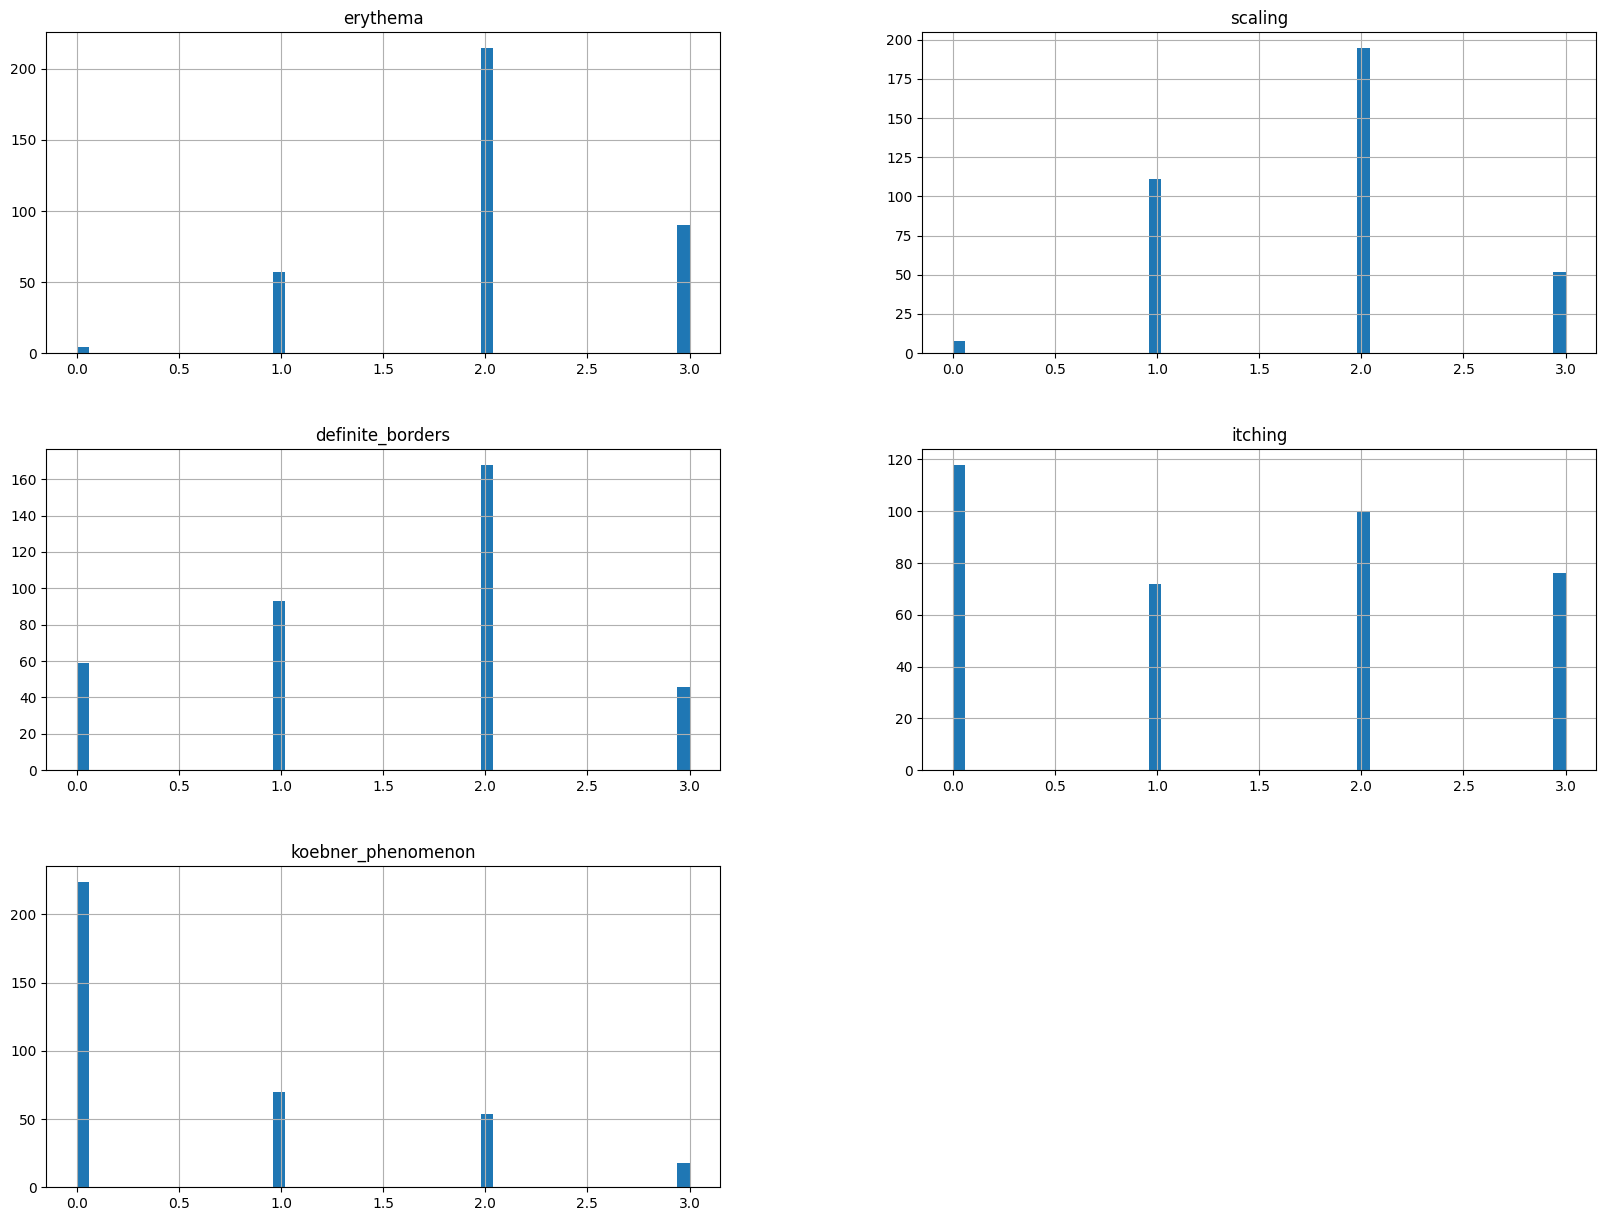

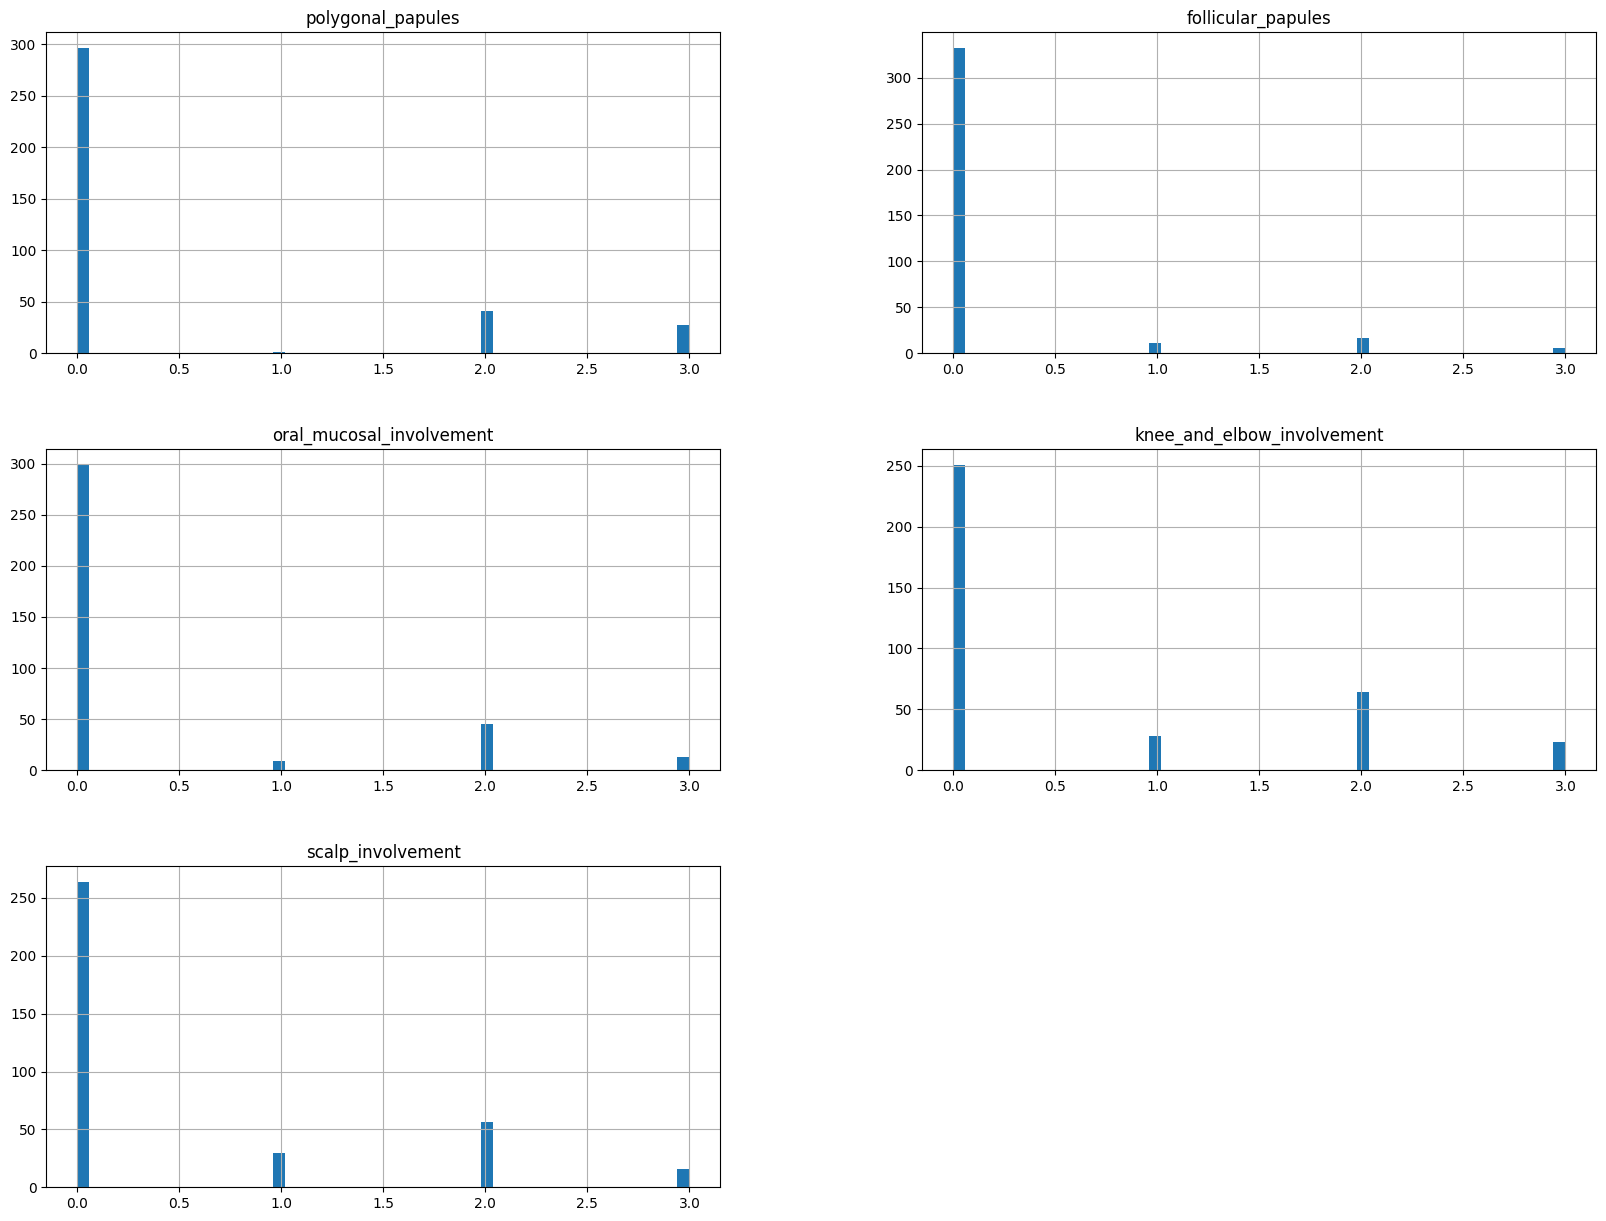

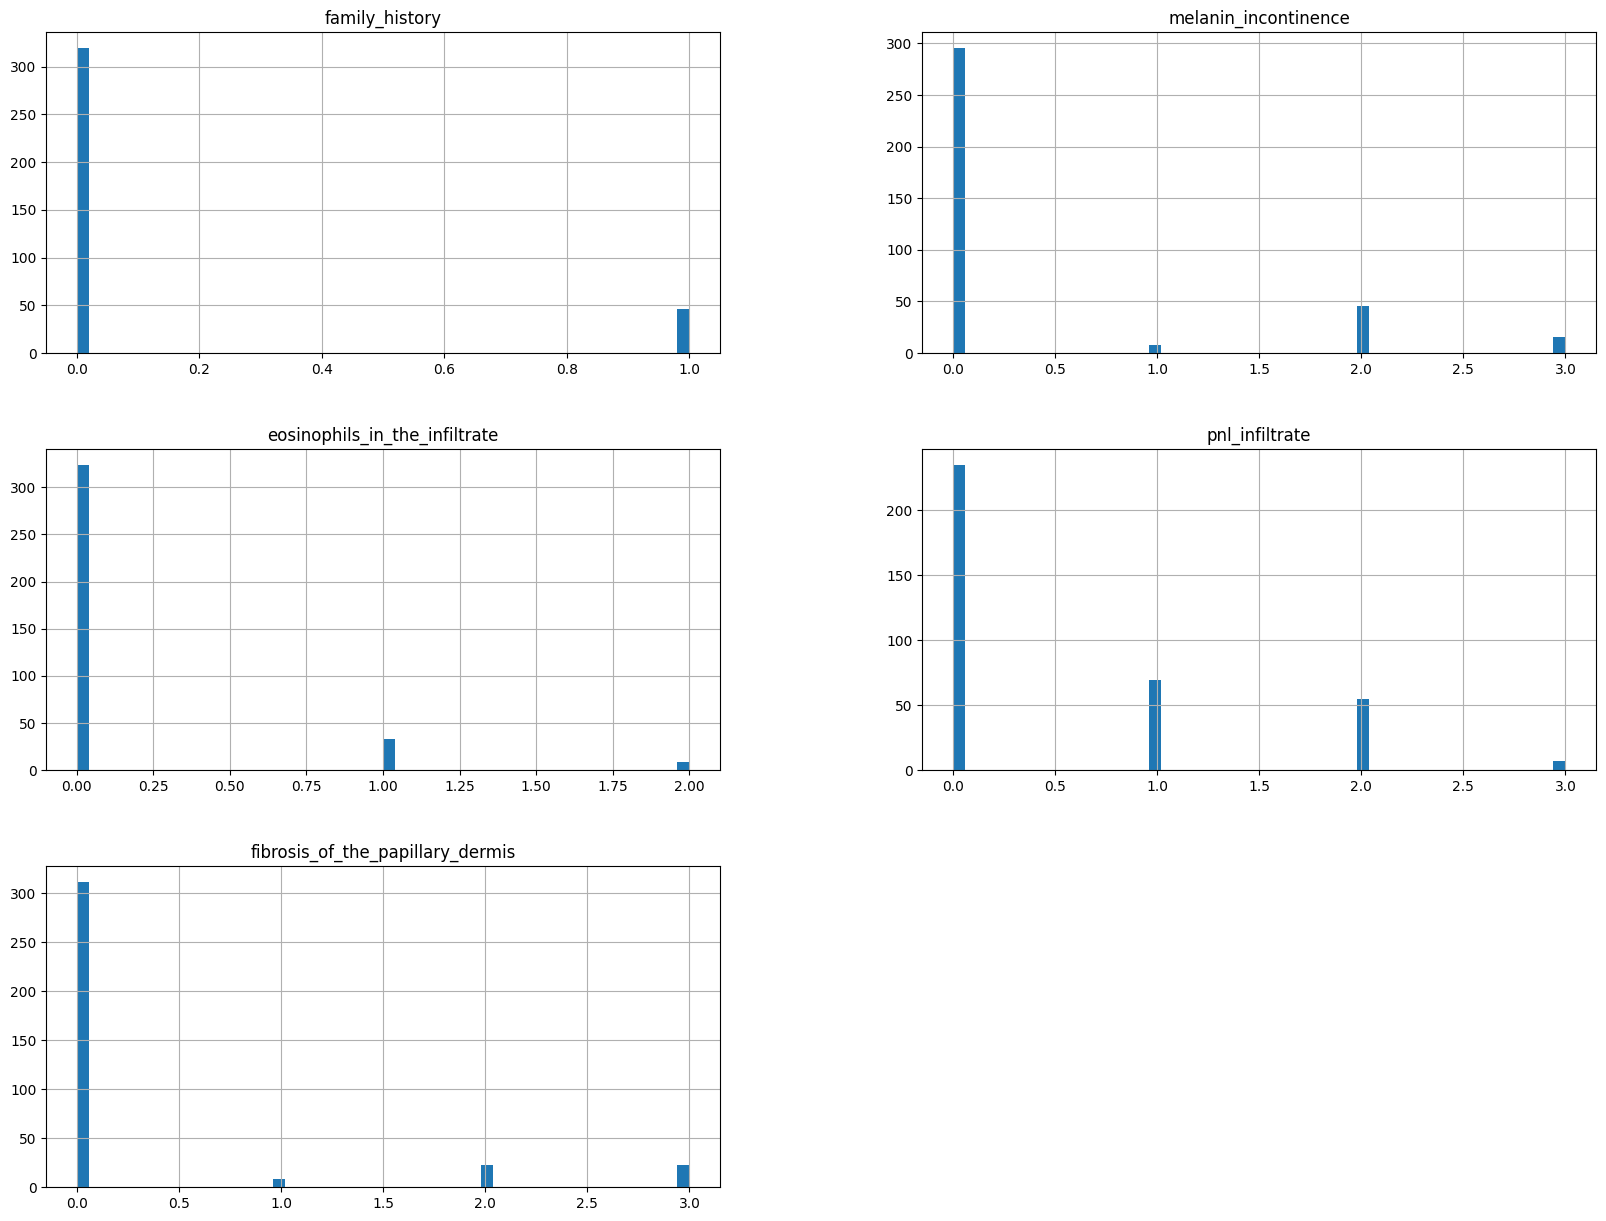

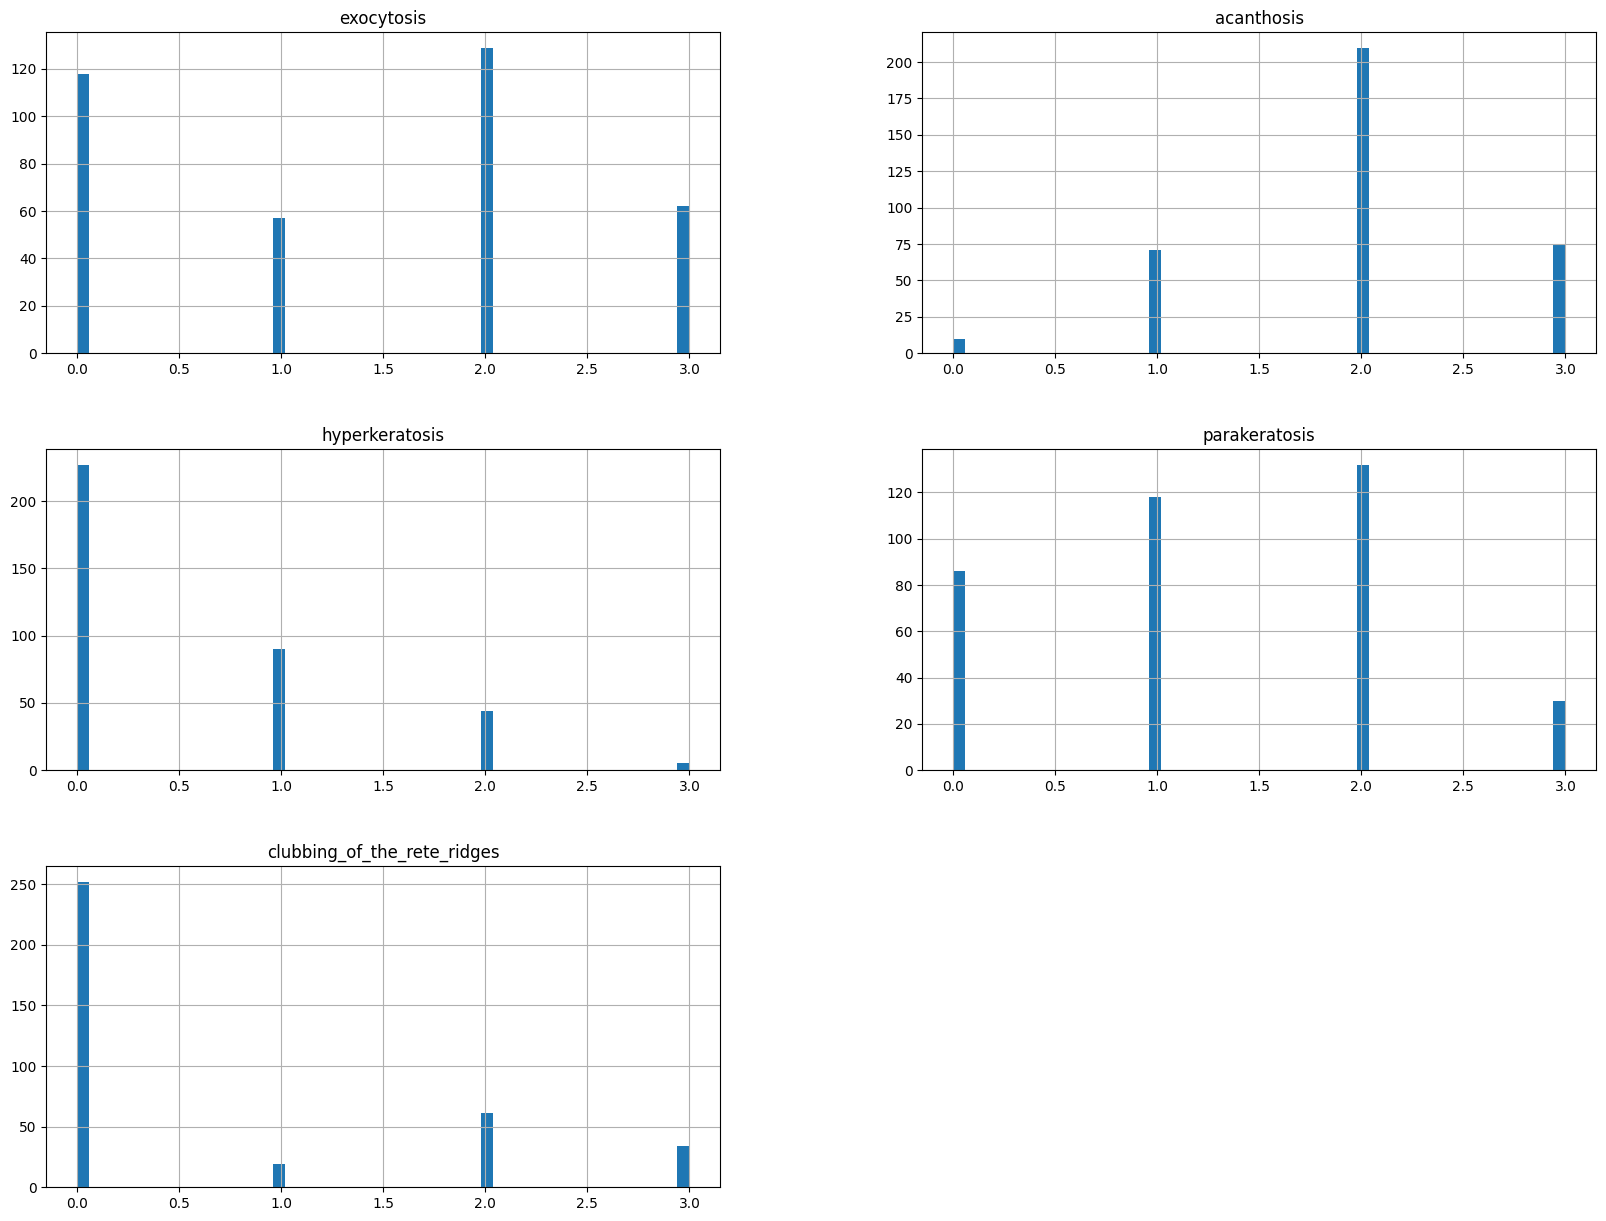

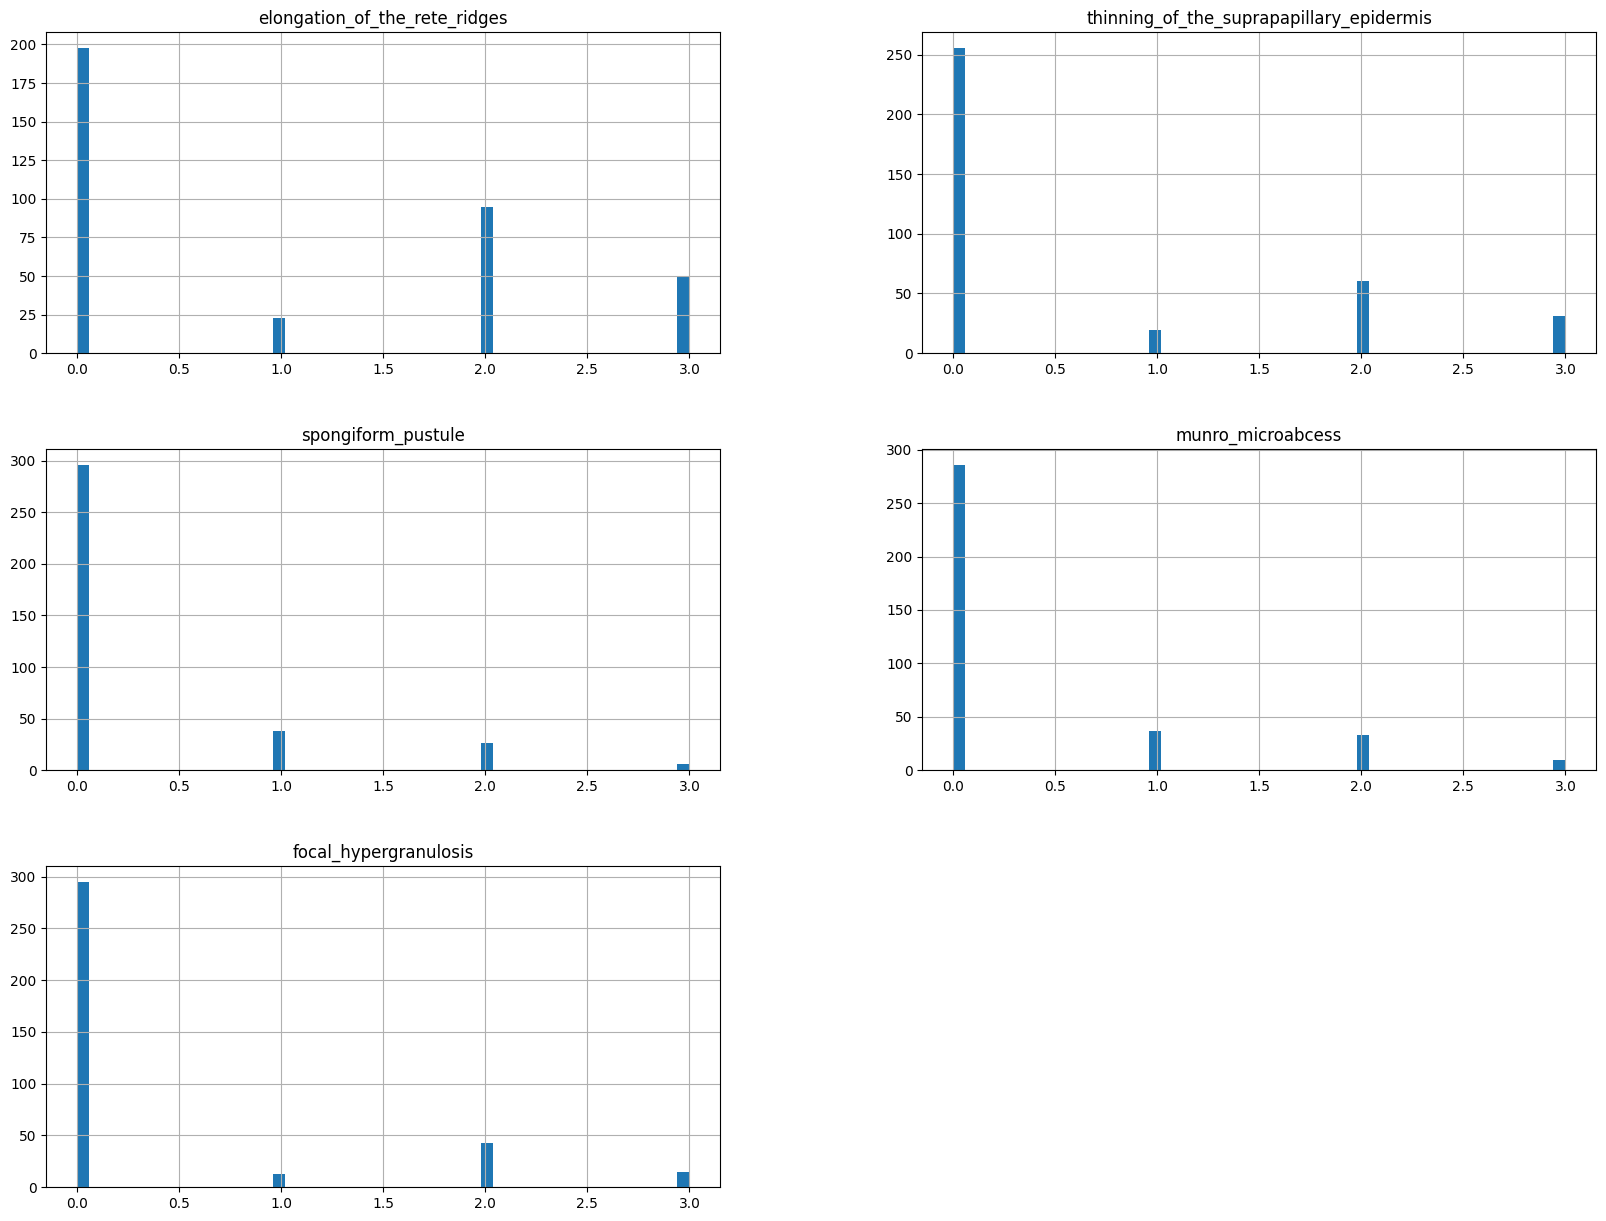

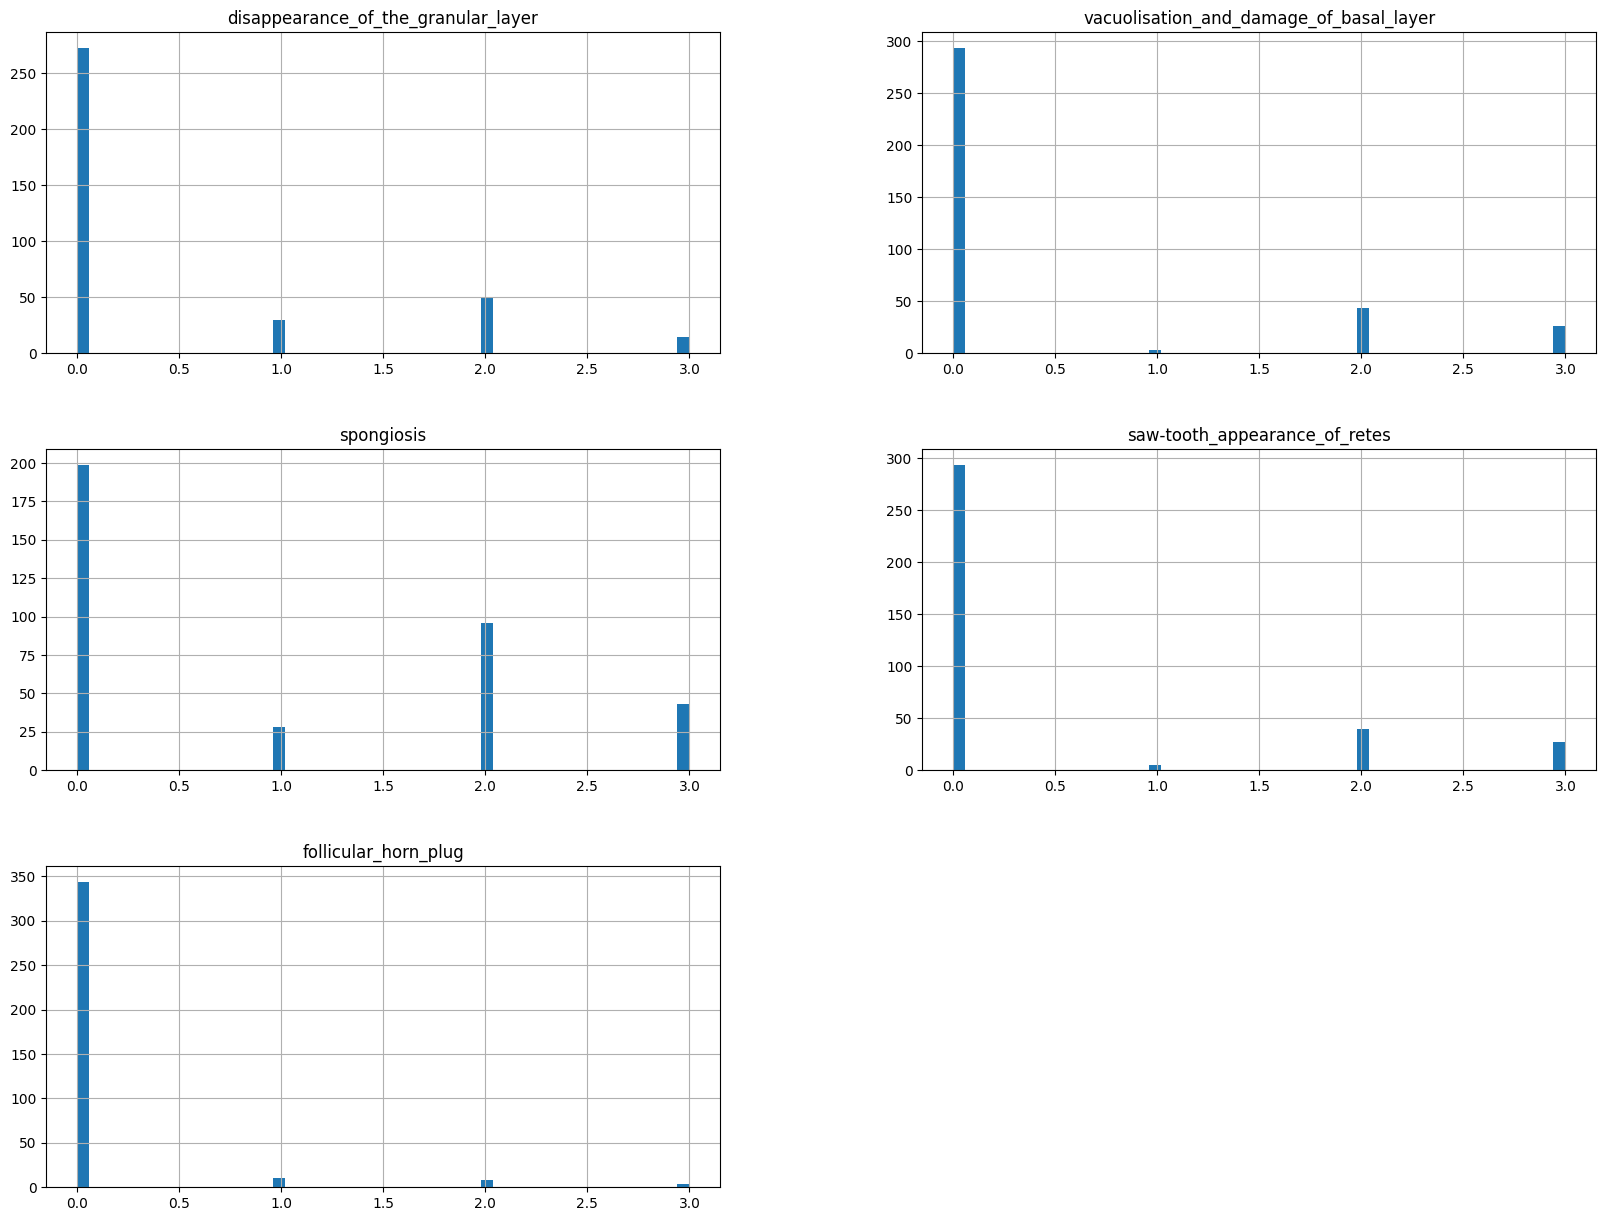

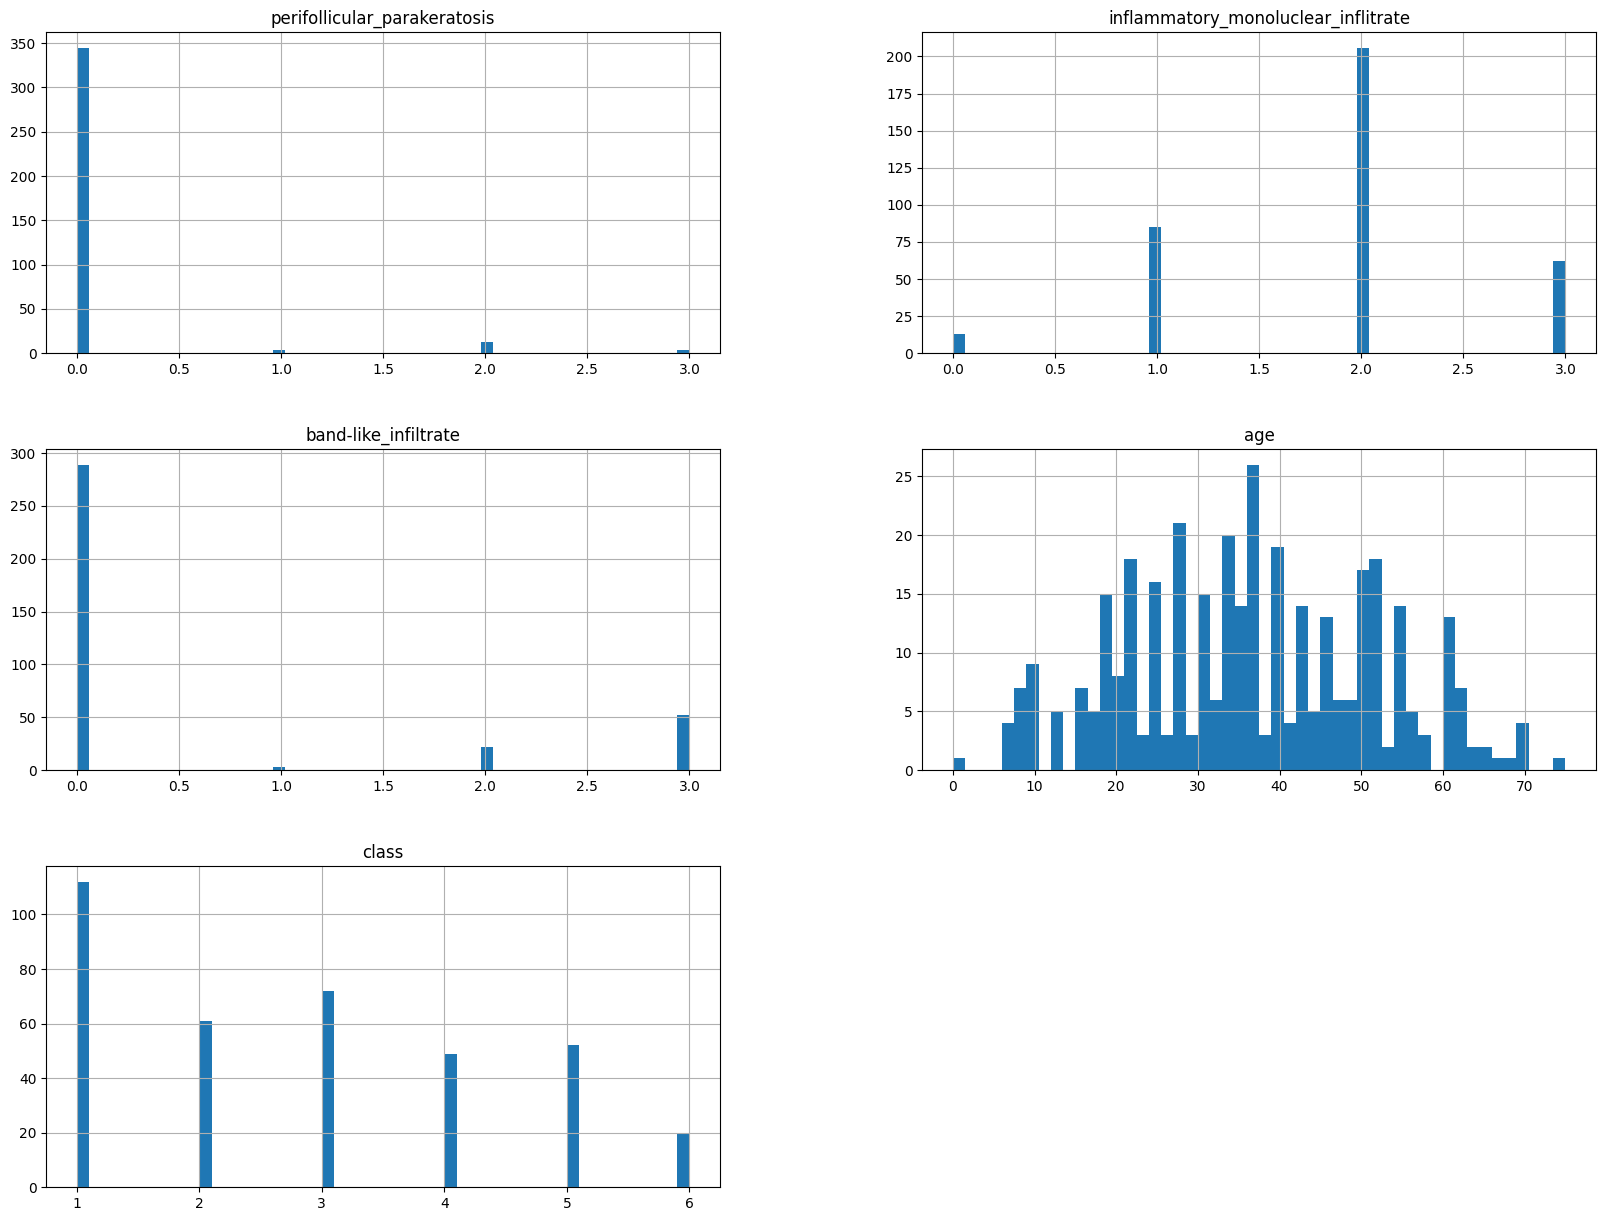

In [ ]:
num_attributes = dermatology.shape[1]
num_plots = 5

for i in range(0, num_attributes, num_plots):
    dermatology.iloc[:, i:i+num_plots].hist(bins=50, figsize=(20,15))
    plt.show()

Using a histogram we cannot detect any outliers, only find rages for the features which is not the purpose of this section. For finding outliers, we will use another visualisation method: a boxplot.
- Boxplot

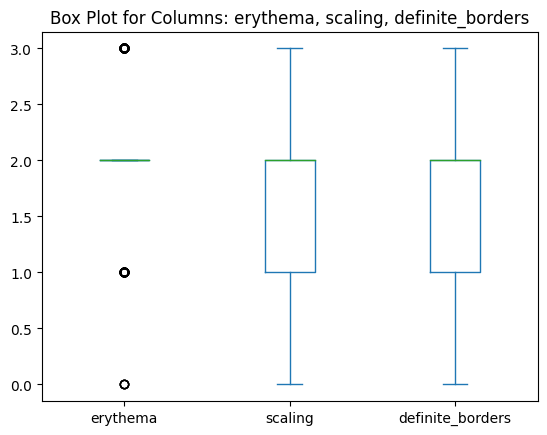

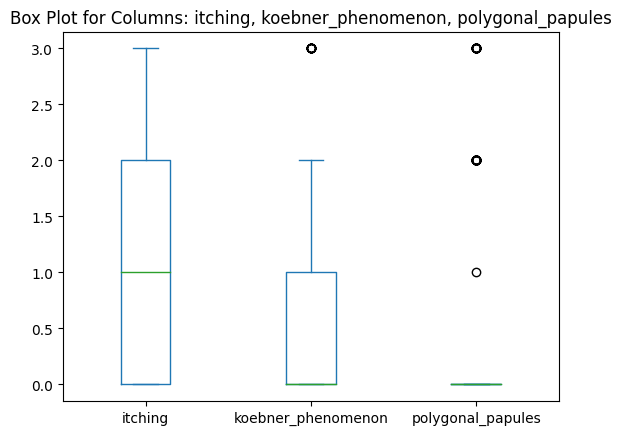

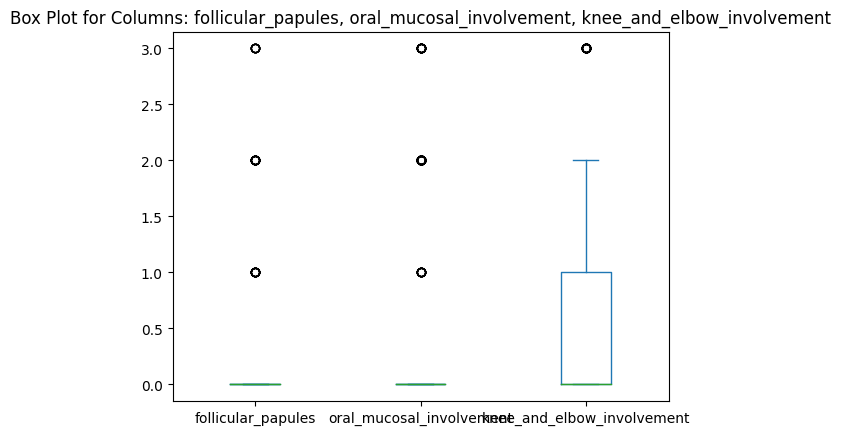

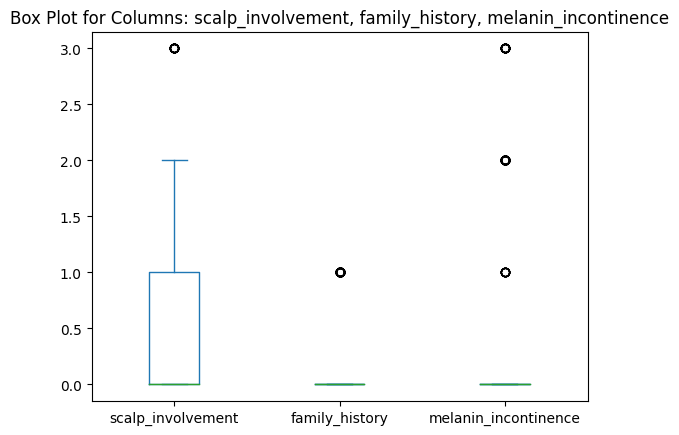

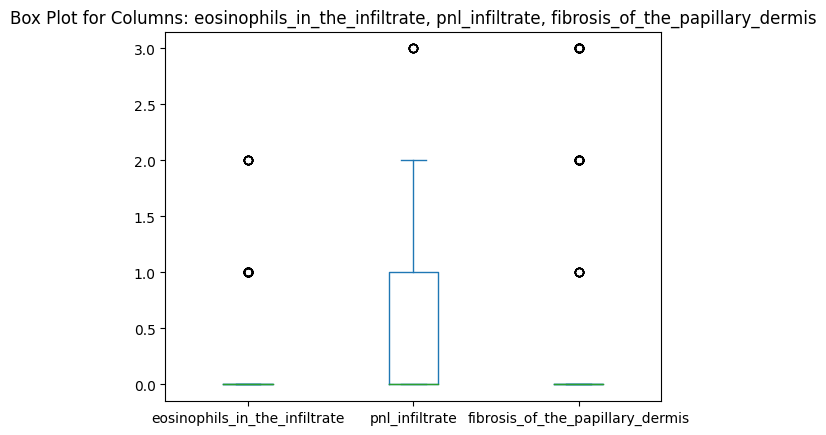

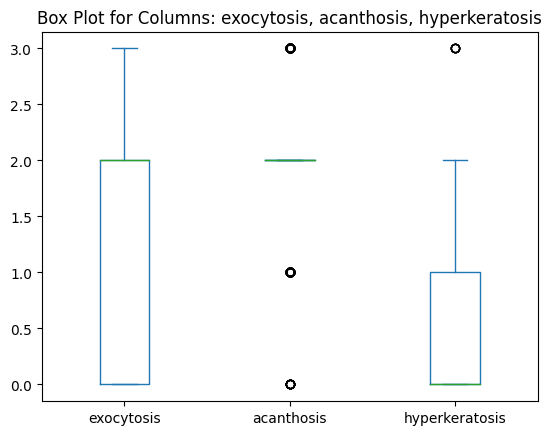

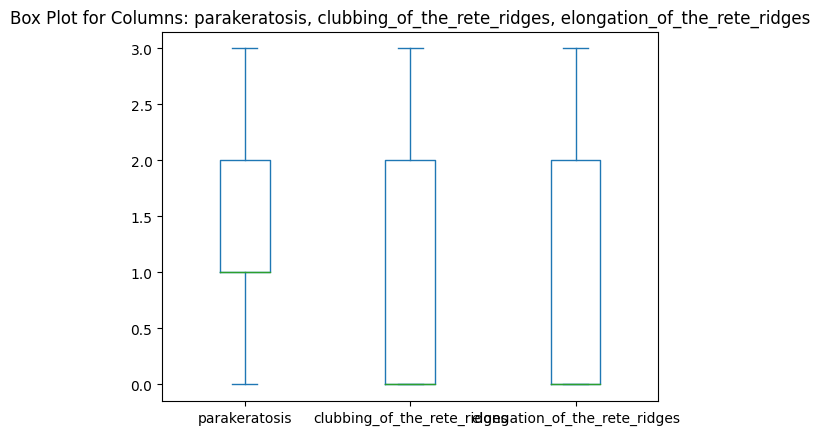

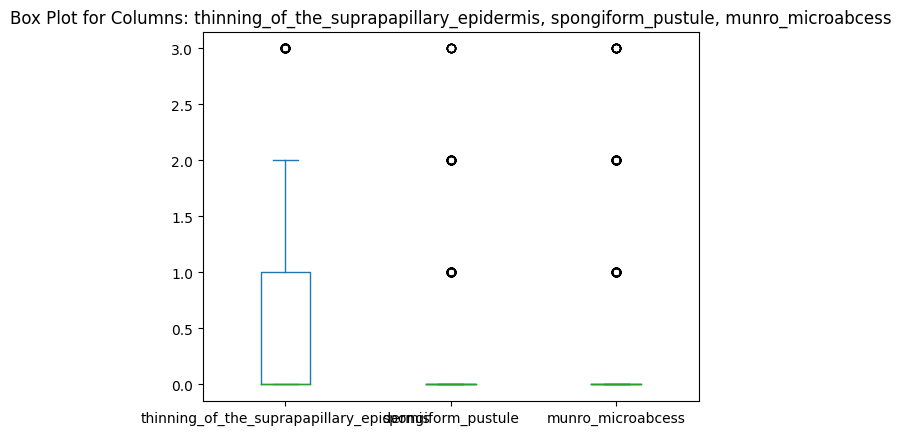

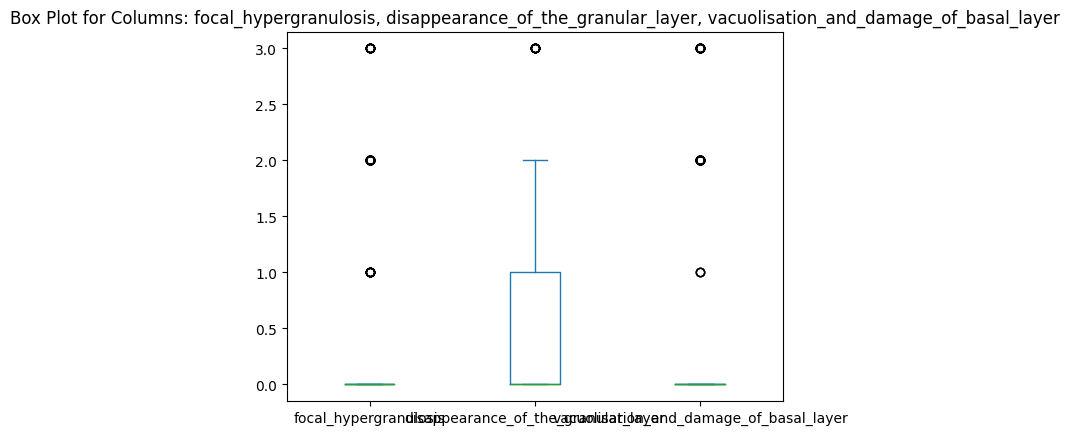

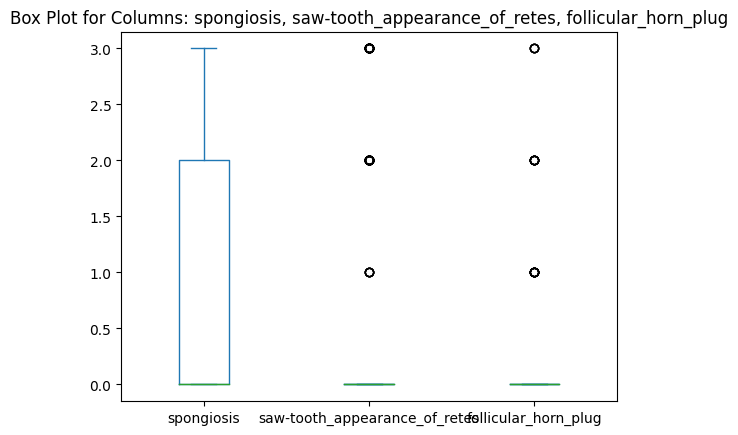

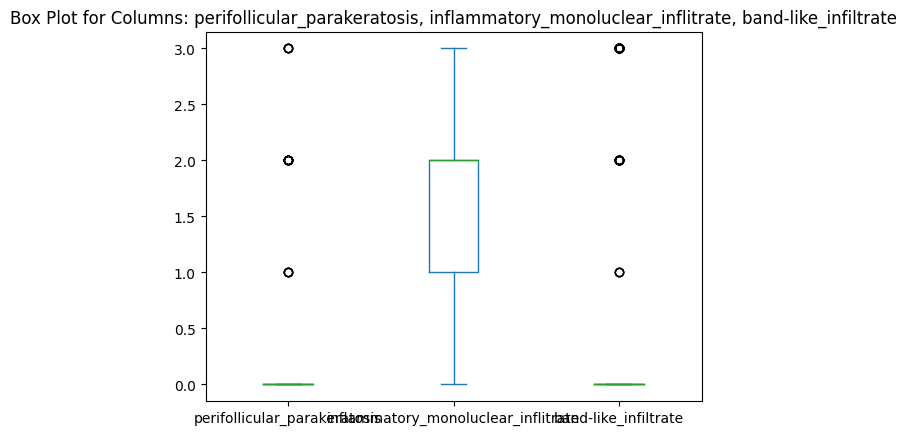

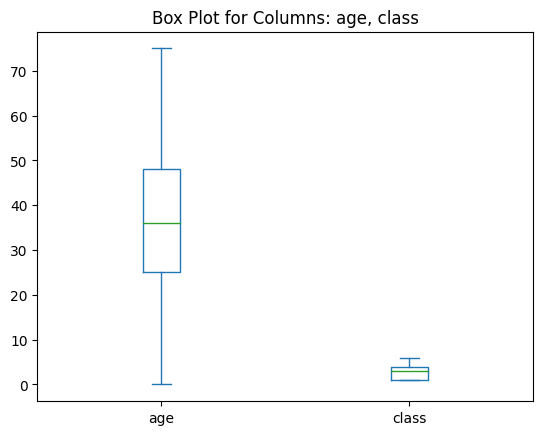

In [ ]:
# Code generated by ChatGPT-3.5

# Get the list of column names
columns = dermatology.columns

# Divide the columns into groups of 3
grouped_columns = [columns[i:i+3] for i in range(0, len(columns), 3)]

# Create subplots for each group of 3 columns
for group in grouped_columns:
    subset = dermatology[group]  # Extract the subset of columns for the current group
    subset.plot(kind='box', vert=True)  # Create a horizontal box plot for the subset
    plt.title("Box Plot for Columns: " + ', '.join(group))
    plt.show()

We can observe that multiple features have outliers (marked with black dots with a white filling), meaning we will need to establish a criteria to manage them. Our criteria will be to substitute them by the mean value if those outliers suppose less than 2.5% of the dataset's values. This criteria has been set in accordance to our objectives and KPIs.


In [ ]:
# Calculate and count outliers using the IQR method
features_with_changed_values=[]
for column in dermatology.columns:
    Q1 = dermatology[column].quantile(0.25)
    Q3 = dermatology[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filter = (dermatology[column] < lower_bound) | (dermatology[column] > upper_bound)
    # print (filter)
    print('Column name:', column)
    print('Total data:', dermatology.shape[0], '. Outliers:', filter.sum())
    #dermatology.loc[filter]
    percentage_of_outliers = filter.sum() / dermatology.shape[0]
    print('Percentage of outliers: ', percentage_of_outliers)
    mean_of_feature = dermatology[column].mean()
    # Change outliers for the mean if the percentage is lower than 2.5%
    if percentage_of_outliers < 0.025 and percentage_of_outliers != 0.0:
        print('Outliers percentage less than 10%. Changing values for mean...')
        # Add the feature to the changed values list
        features_with_changed_values.append(column)
        # Change outliers for the mean
        for index in dermatology.index[filter]:
            dermatology.at[index, column] = mean_of_feature
    print('\n')

#print('Total outliers: ', num_total_outliers)
#print('Percentage of outliers: ', (num_total_outliers/len(dermatology))*100)
#plt.figure(figsize=(40, 24)) # Tamaño personalizado de la figura
#dermatology.boxplot()
#plt.show()

Column name: erythema
Total data: 366 . Outliers: 151
Percentage of outliers:  0.412568306010929


Column name: scaling
Total data: 366 . Outliers: 0
Percentage of outliers:  0.0


Column name: definite_borders
Total data: 366 . Outliers: 0
Percentage of outliers:  0.0


Column name: itching
Total data: 366 . Outliers: 0
Percentage of outliers:  0.0


Column name: koebner_phenomenon
Total data: 366 . Outliers: 18
Percentage of outliers:  0.04918032786885246


Column name: polygonal_papules
Total data: 366 . Outliers: 69
Percentage of outliers:  0.1885245901639344


Column name: follicular_papules
Total data: 366 . Outliers: 33
Percentage of outliers:  0.09016393442622951


Column name: oral_mucosal_involvement
Total data: 366 . Outliers: 67
Percentage of outliers:  0.1830601092896175


Column name: knee_and_elbow_involvement
Total data: 366 . Outliers: 23
Percentage of outliers:  0.06284153005464481


Column name: scalp_involvement
Total data: 366 . Outliers: 16
Percentage of outliers:

In order to verify that we have removed the outliers correctly, we will boxplot once again the features in which we have changed the outliers for the mean and verify that the outliers have been changed successfully.

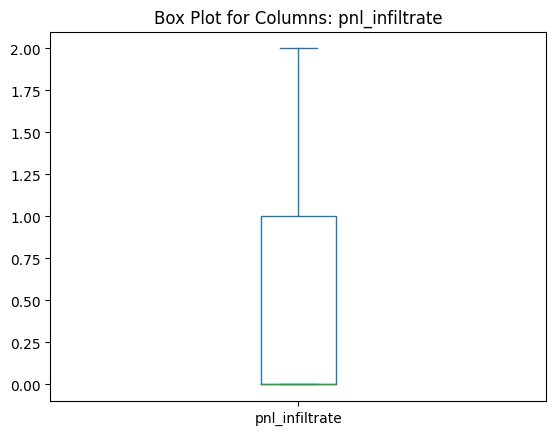

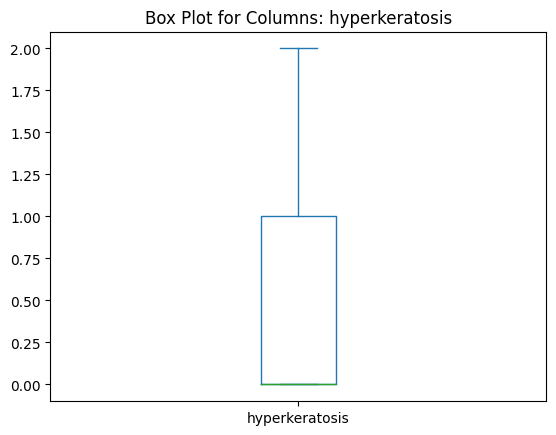

In [ ]:
# Divide the features into groups of 3
grouped_columns = [features_with_changed_values[i:i+3] for i in range(0, len(features_with_changed_values), 3)]

# Create subplots for each group of 3 columns
for group in features_with_changed_values:
    subset = dermatology[group]  # Extract the subset of columns for the current group
    subset.plot(kind='box', vert=True)  # Create a horizontal box plot for the subset
    plt.title("Box Plot for Columns: " + group)
    plt.show()

As we can visualise from our verification, we could only find 2 features with "outliers". We will refer to them as outliers due to them ammounting to 2.5% of each feature. We initially established that those "outliers" ammounted to lest than 10%. Nevertheless, we determined that this percentage would vary greatly the outcome of our training and could generate misleading results (We would be varying 36 rows from a small dataset of 366 datapoints)

- Bar Graphs

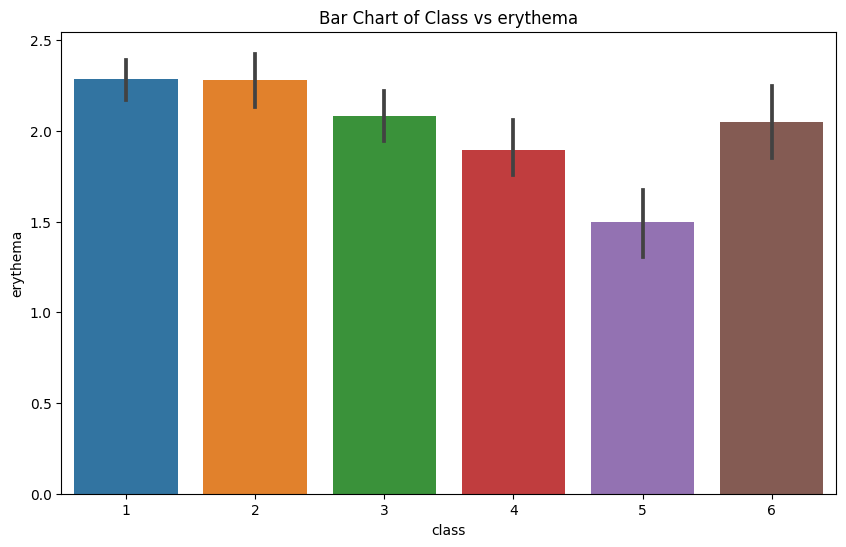

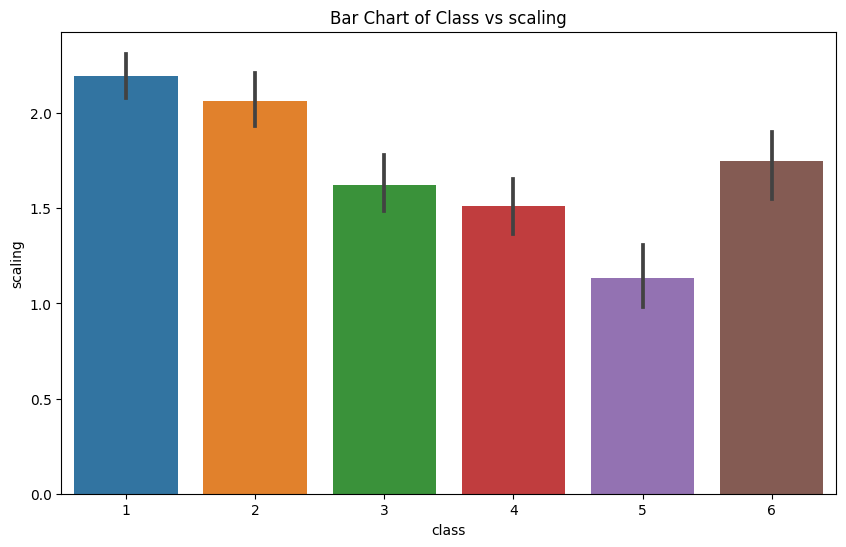

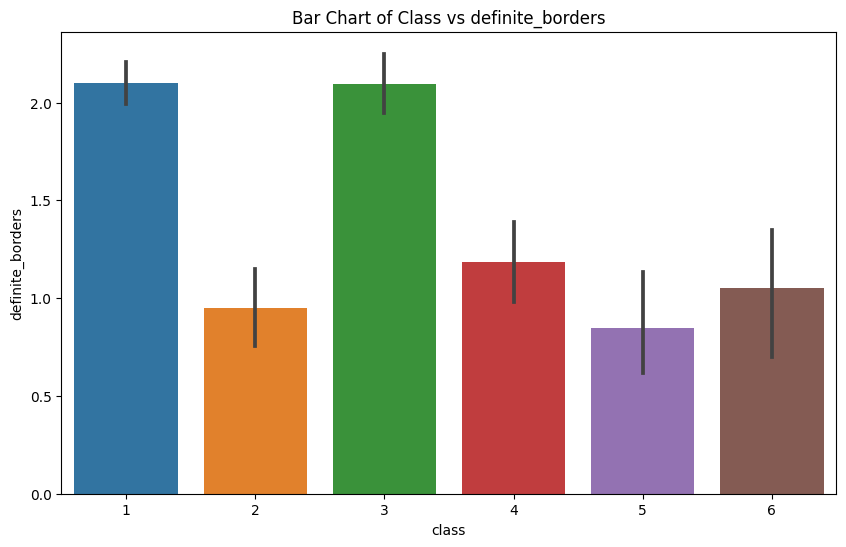

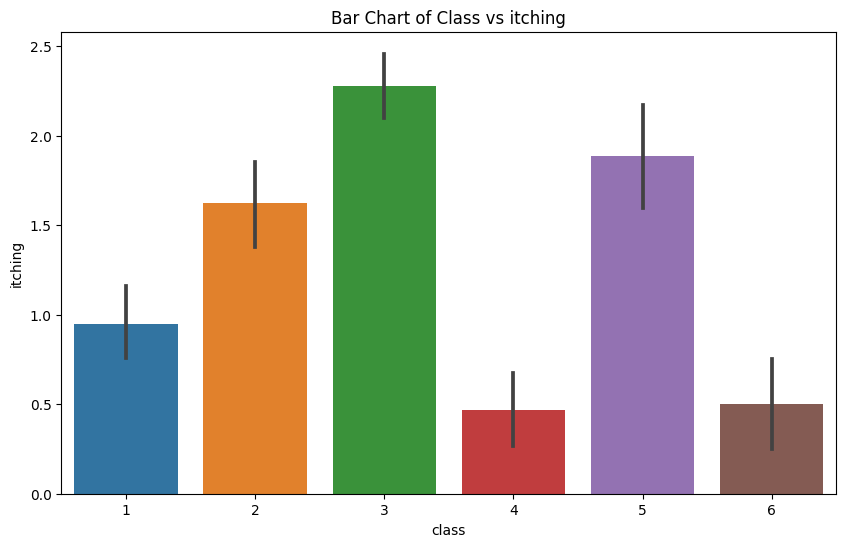

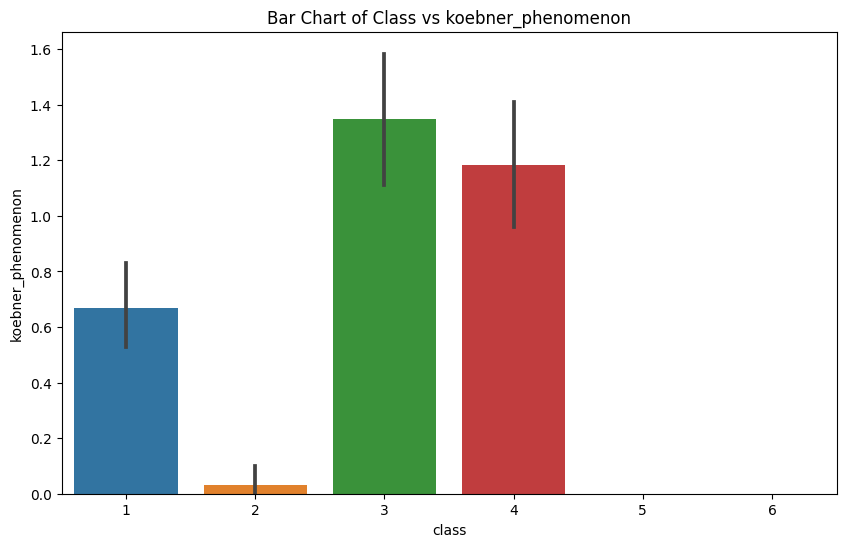

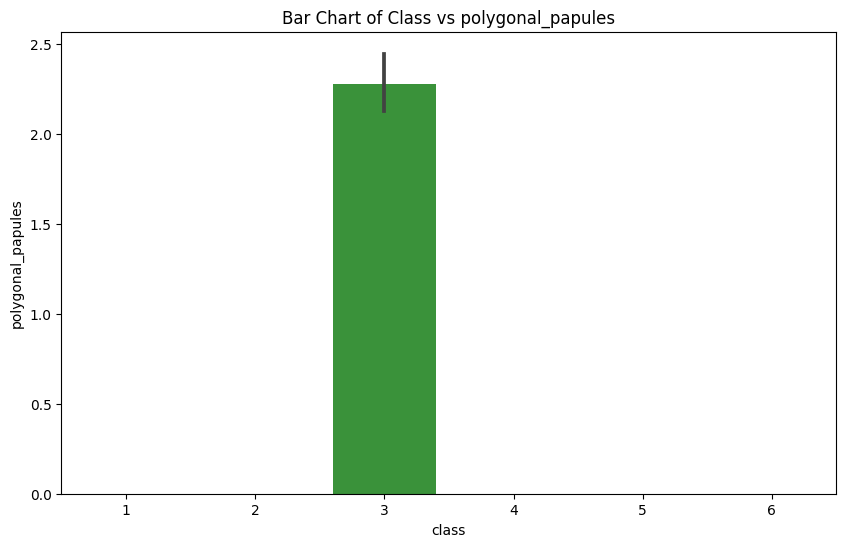

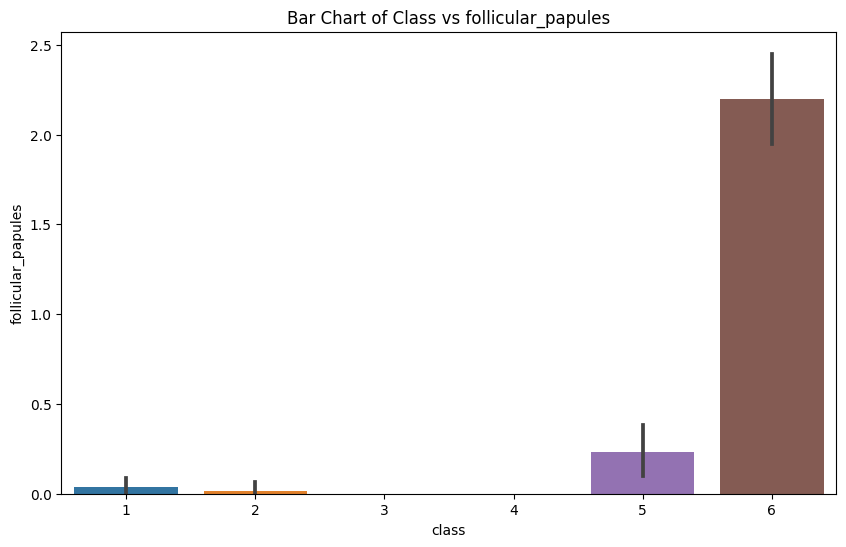

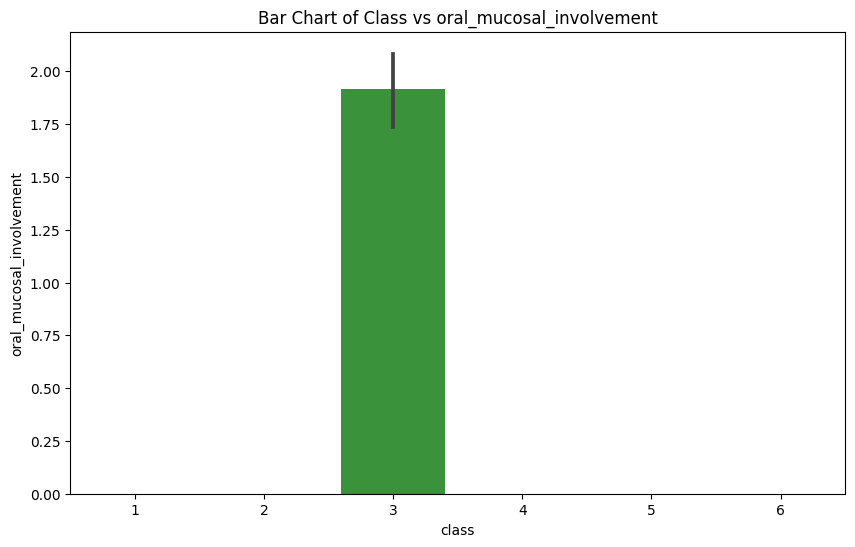

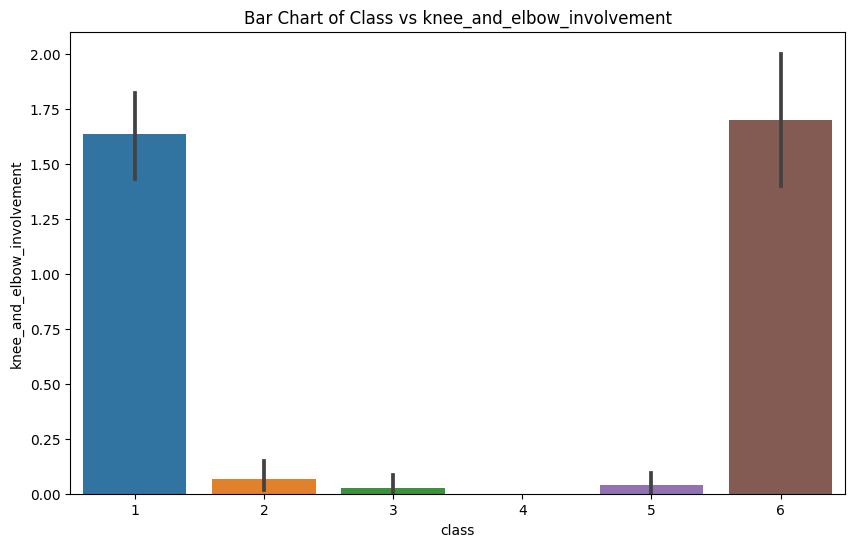

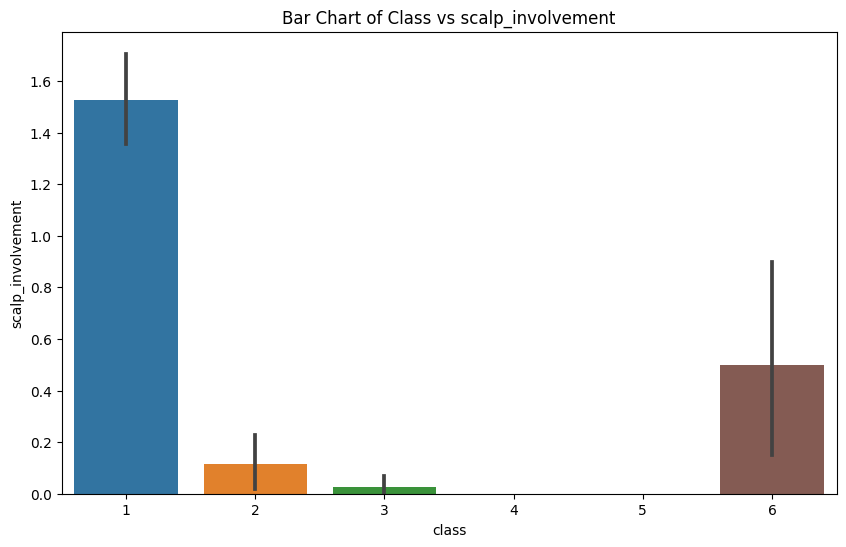

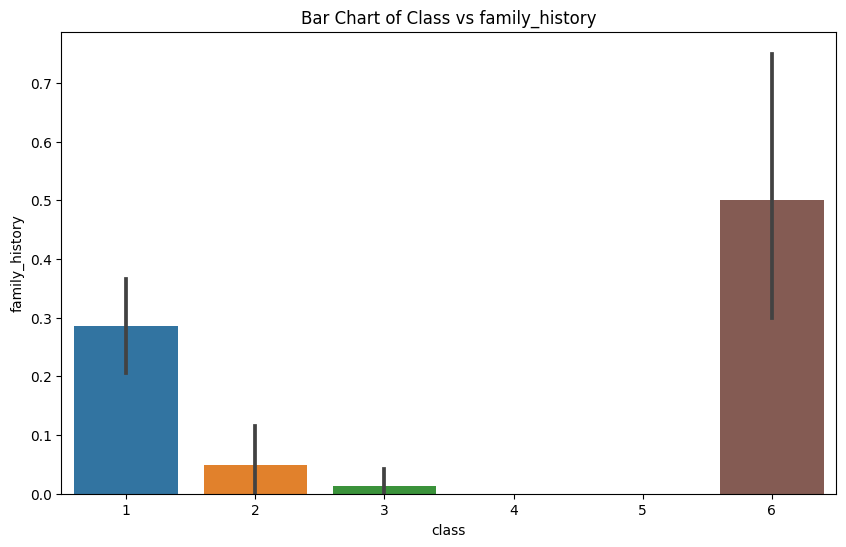

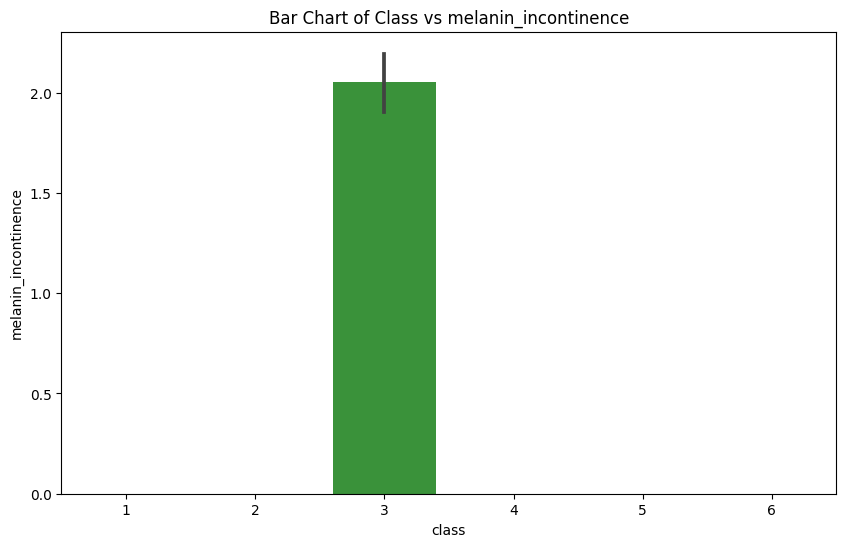

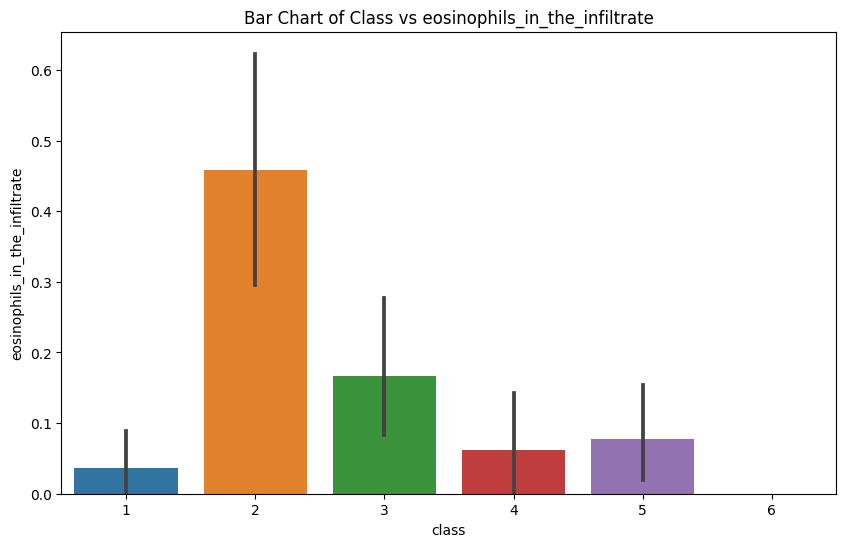

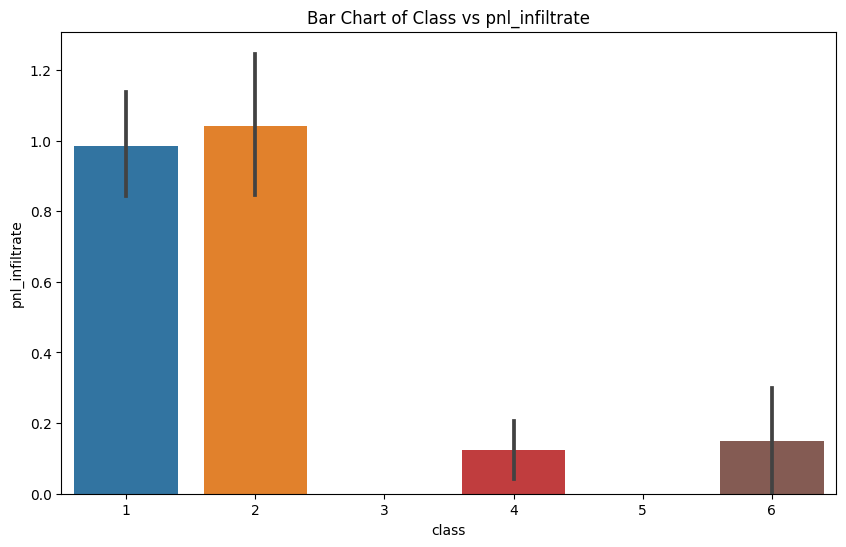

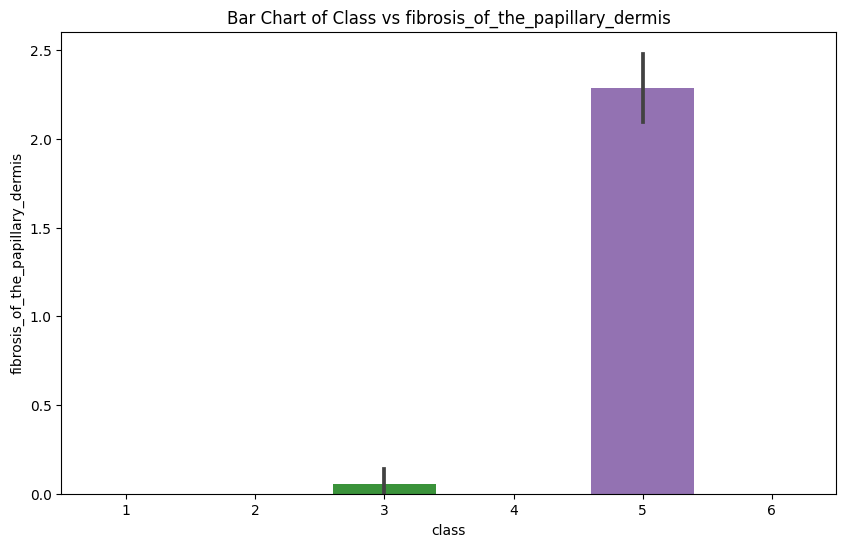

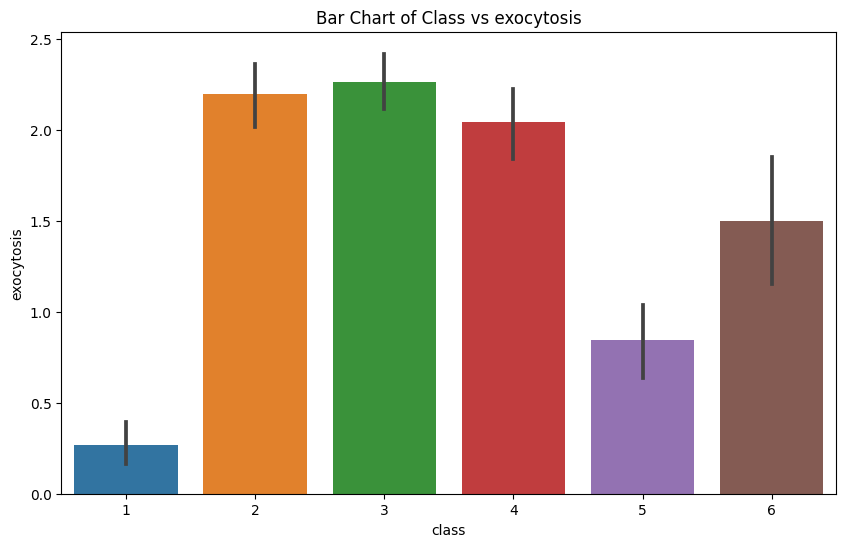

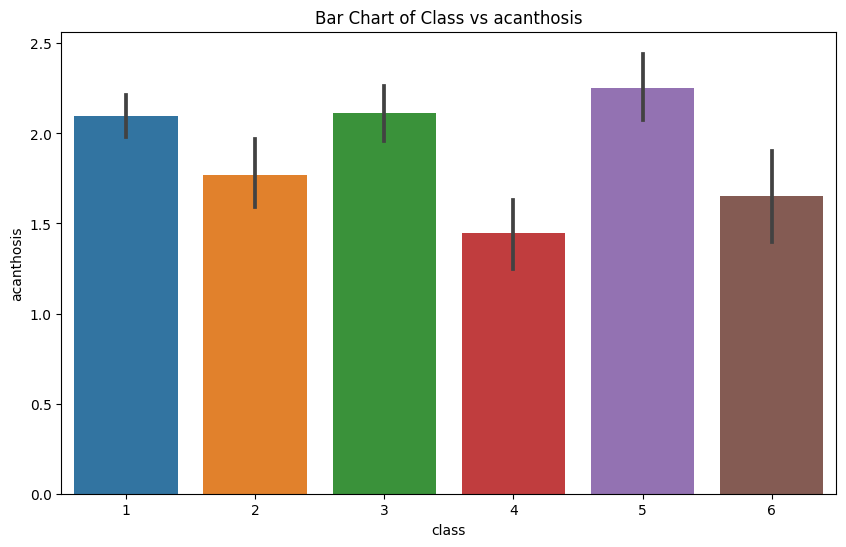

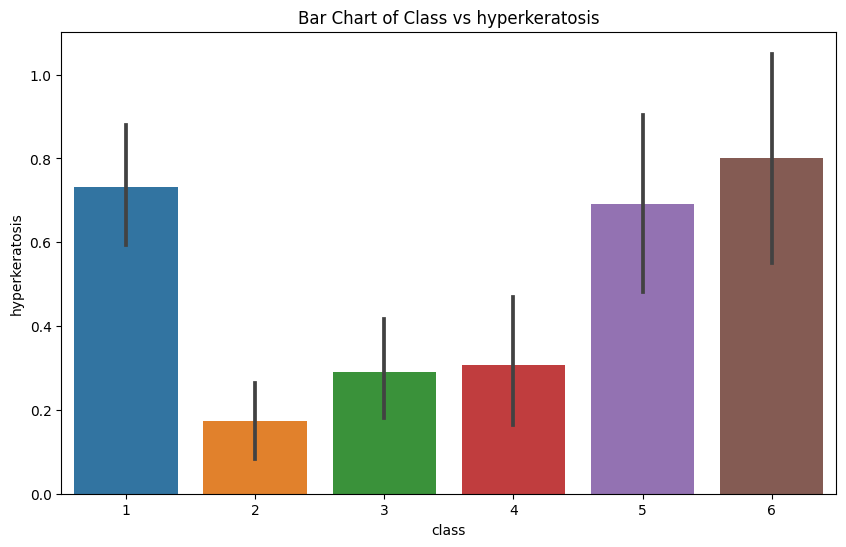

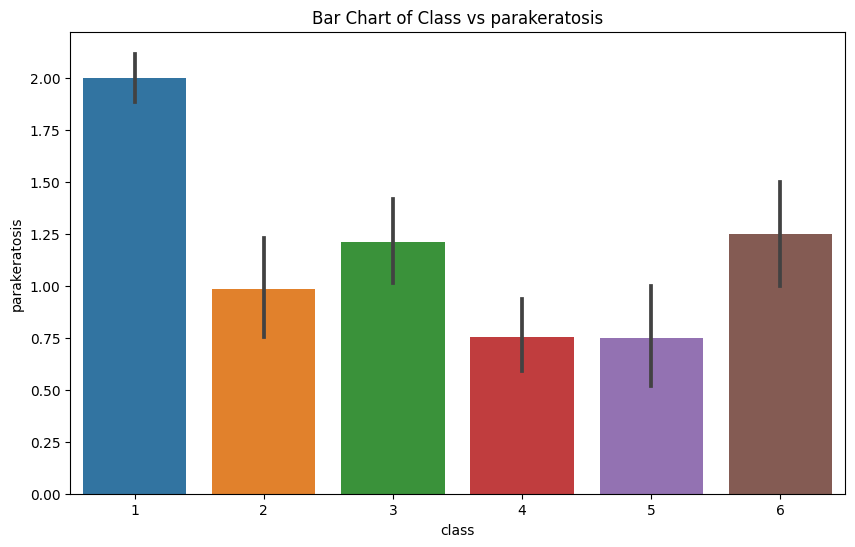

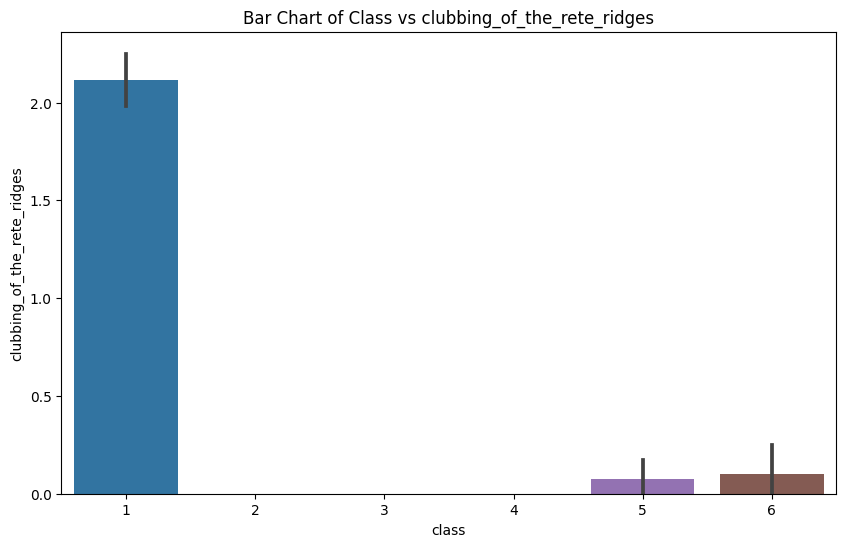

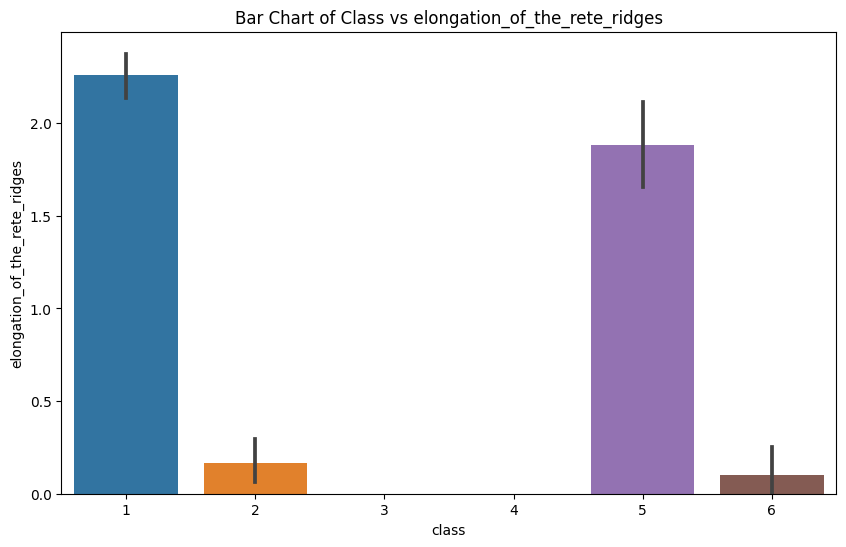

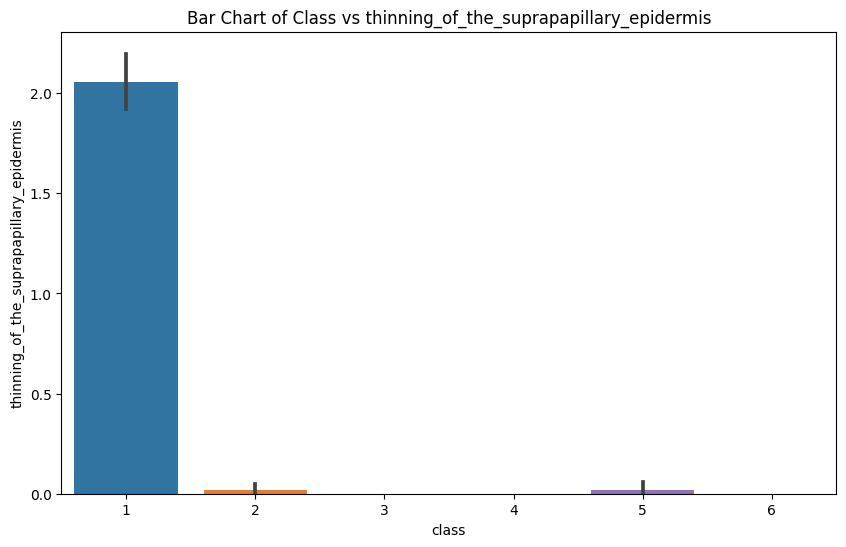

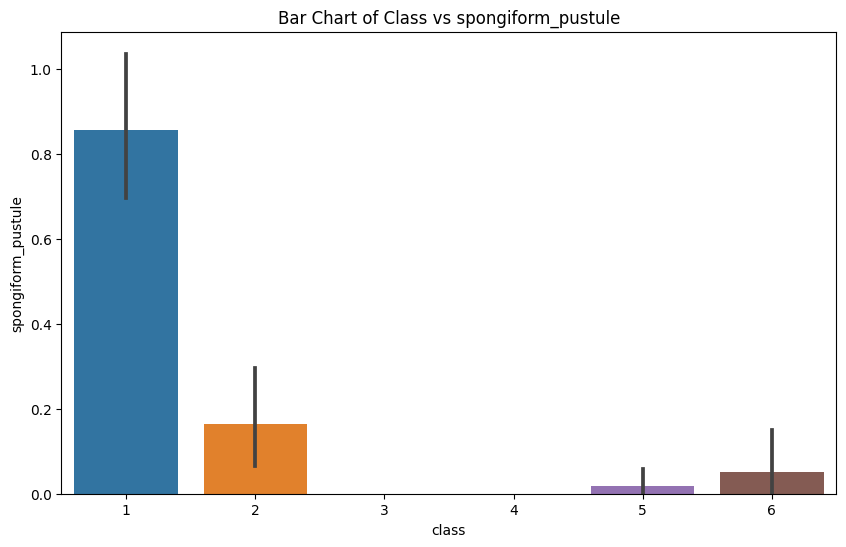

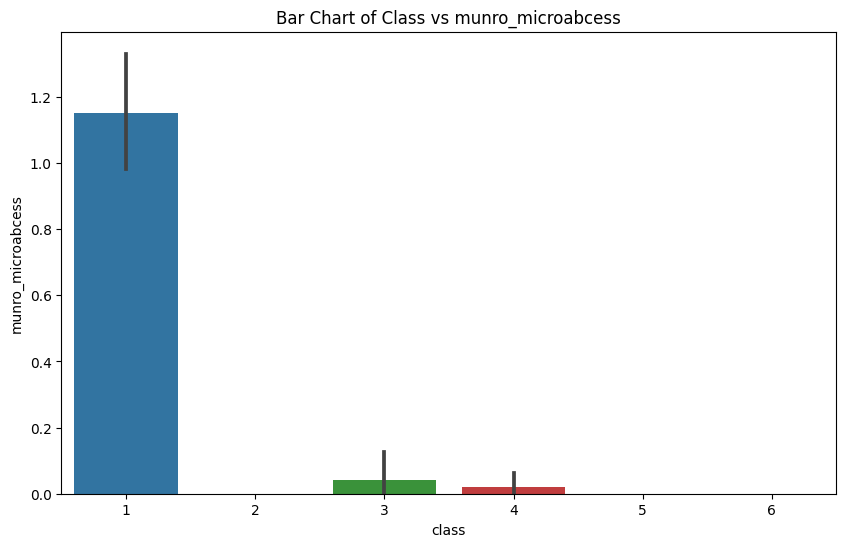

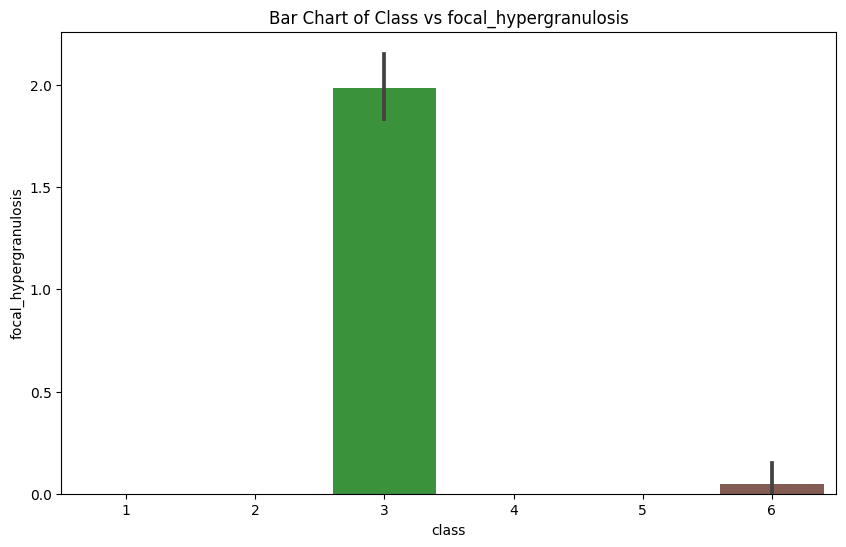

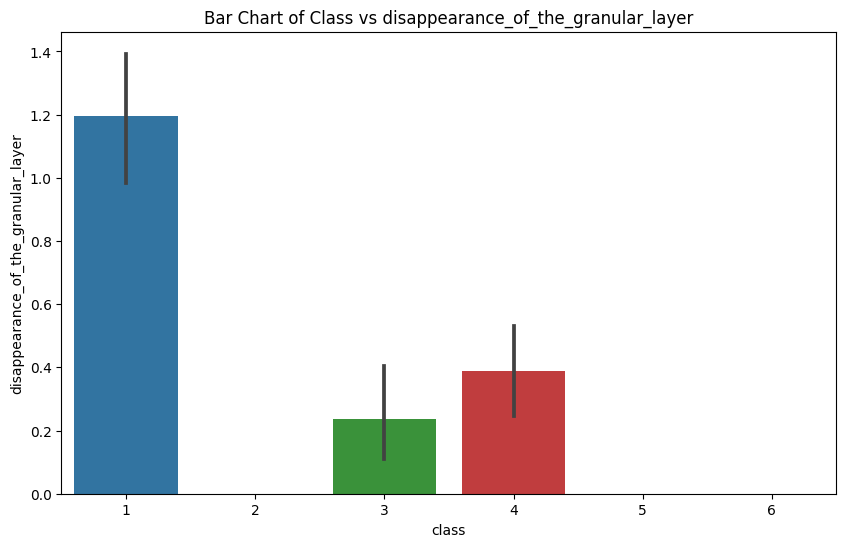

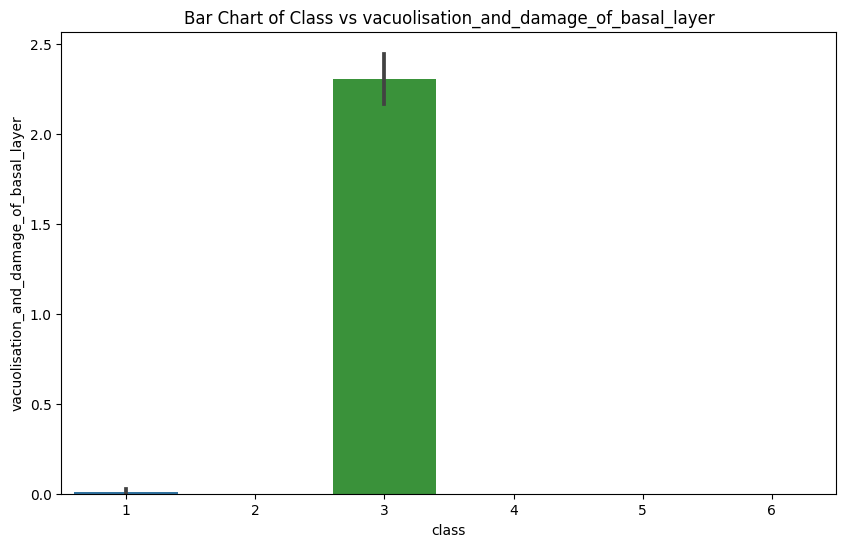

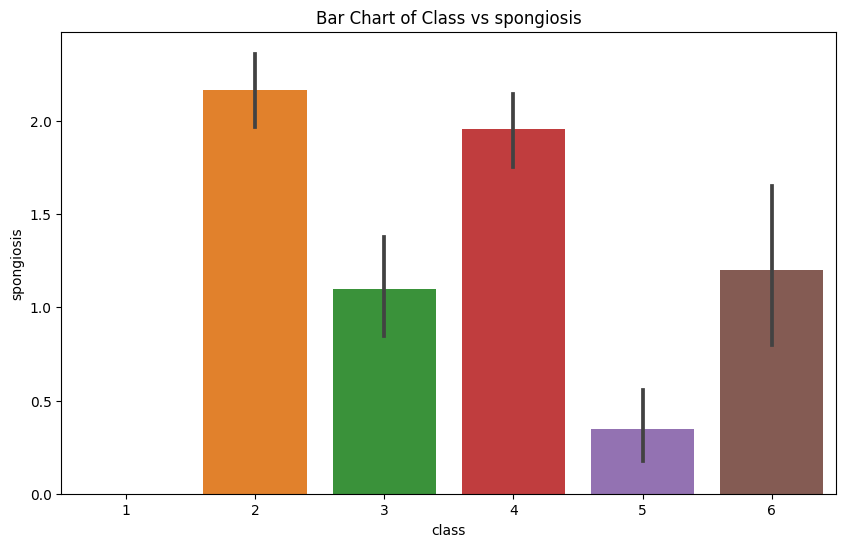

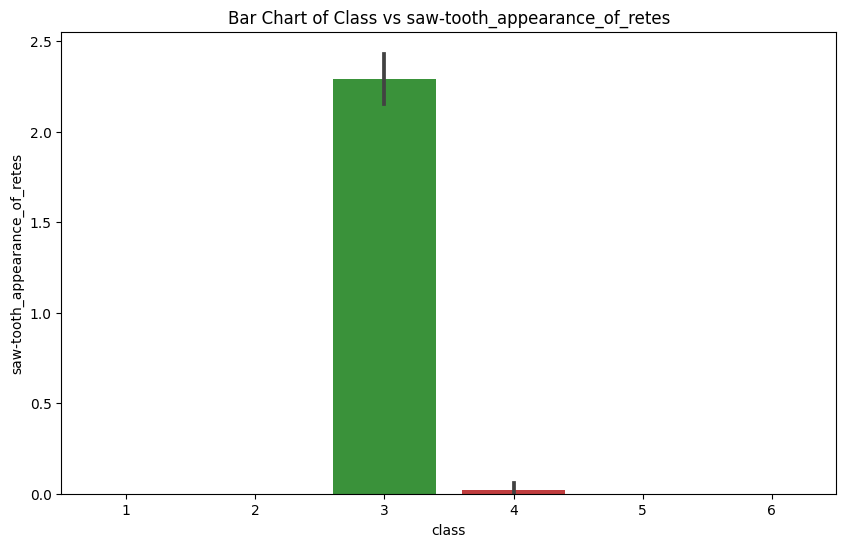

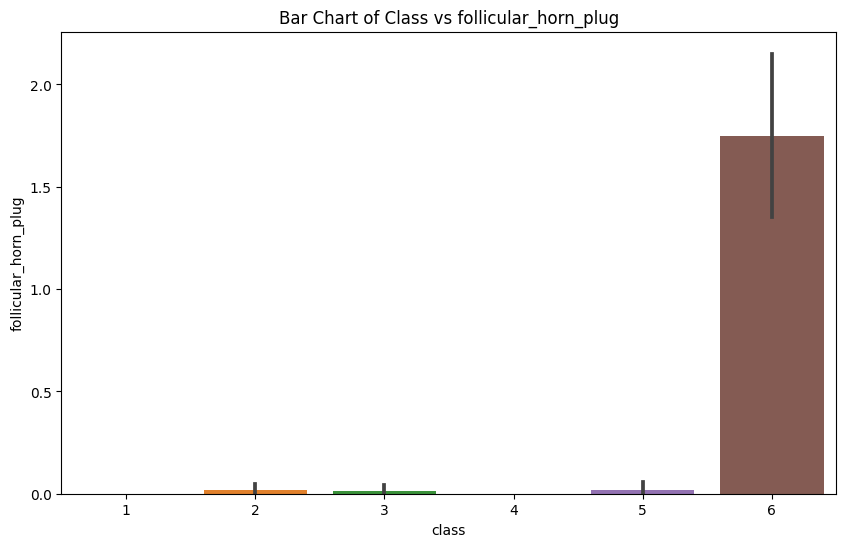

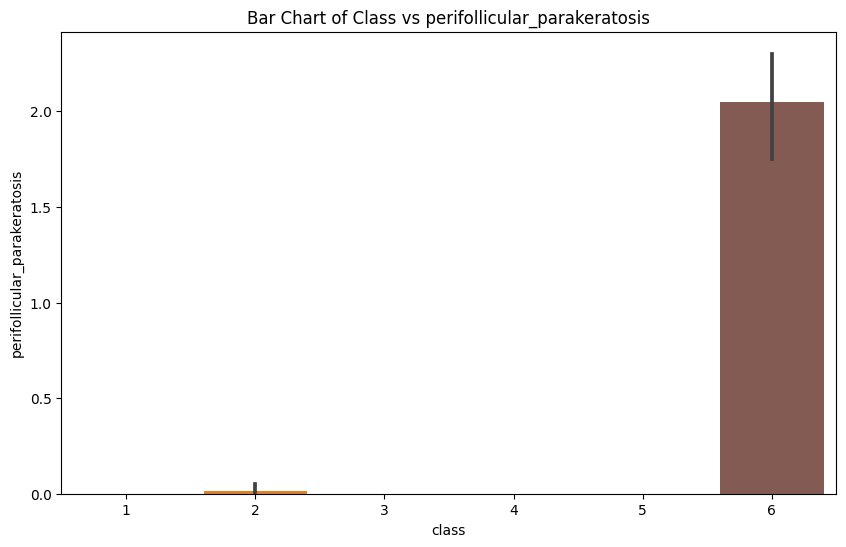

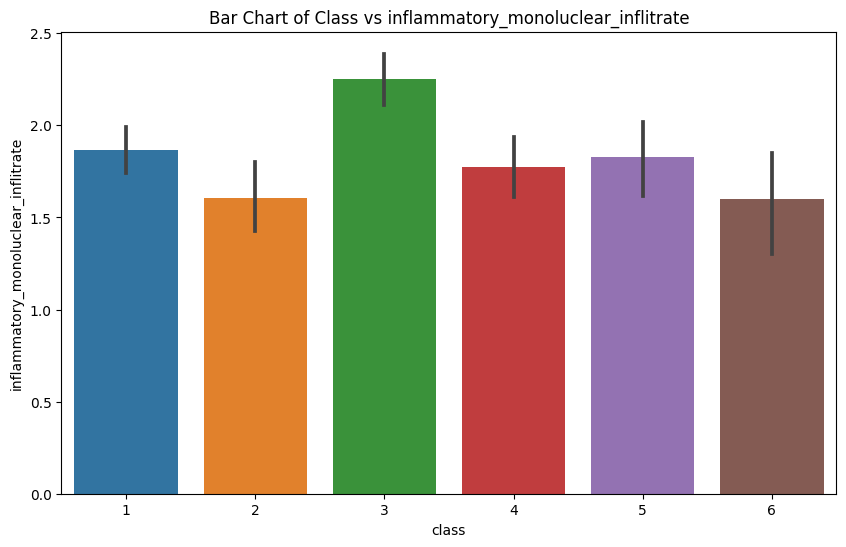

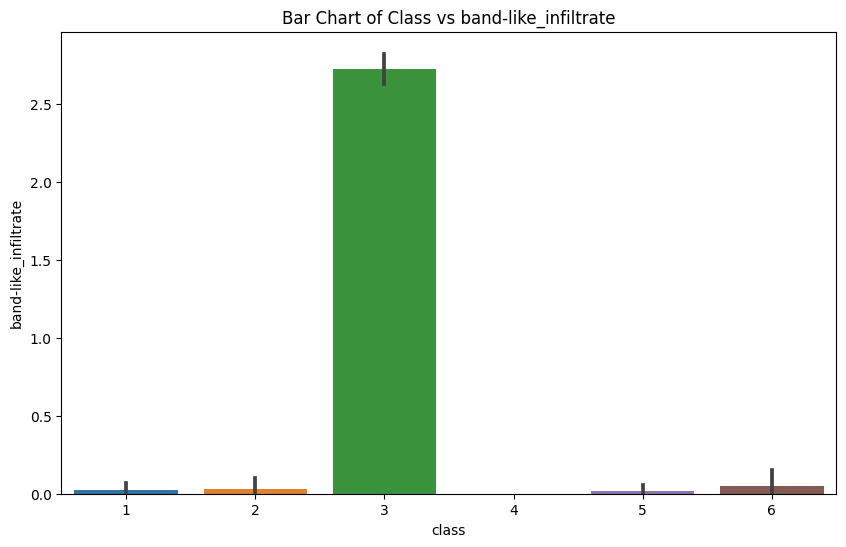

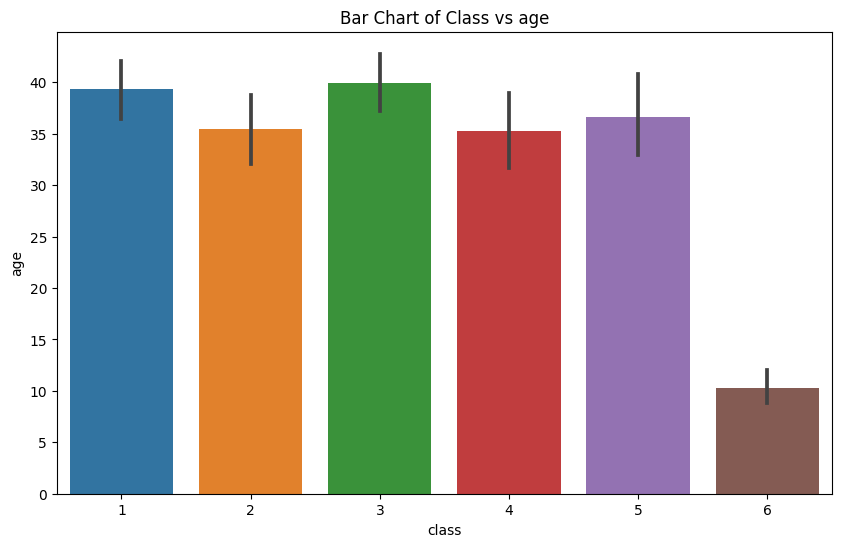

In [ ]:
import seaborn as sns

for column_index, column in enumerate(dermatology.columns):
    if column == 'class':
        continue
    plt.figure(figsize=(10, 6))
    sns.barplot(x='class', y=column, data=dermatology)
    plt.title(f'Bar Chart of Class vs {column}')
    plt.show()

From the observation of the bar graphs we can suppose the following correlations:
- The '1' category of the disease will appear on individual with a high presence of marks on knees and elbows, high involvement of scalps, high pnl infiltrate, medium-high parakeratosis, high clubbing of the rete ridges, high elongation of the rete ridges, high thinning of the suprapapillary epidermis, low spongiform pustule, low munro microabcess and low disappearnce of the granular layer.
- The '2' category of the disease will appear on individual with a low presence of pnl infiltrate, medium-high exocytosis and medium-high spongiosis.
- The '3' category of the disease will appear on individuals with a high presence of polygonal papules, a high involvement of the oral mucosal, a high melanin incontinence, high focal hypergranulosis, high vacuolisation and damage of basal layer, high saw-tooth appearance of retes and high band-like infiltrate.
- The '4' category of the disease will appear on individuals with a low presence of the Koebner phenomenon, medium-high exocytosis and medium-high spongiosis.
- The '5' category of the disease will appear on individuals with a high presence of fibrosis of the papillary dermis and medium-high elongation of the rete ridges.
- The '6' category of the disease will appear on individuals with a high presence of follicular papules, a medium-high involvement of the knee and elbow, if a family member has previously had it, medium-high follicular horn plug and medium-high perifollicular parakeratosis. It also appears in younger ages.
- The rest of the features can be associated to the disease in general from our supposition.

- Seaborn ViolinPlot

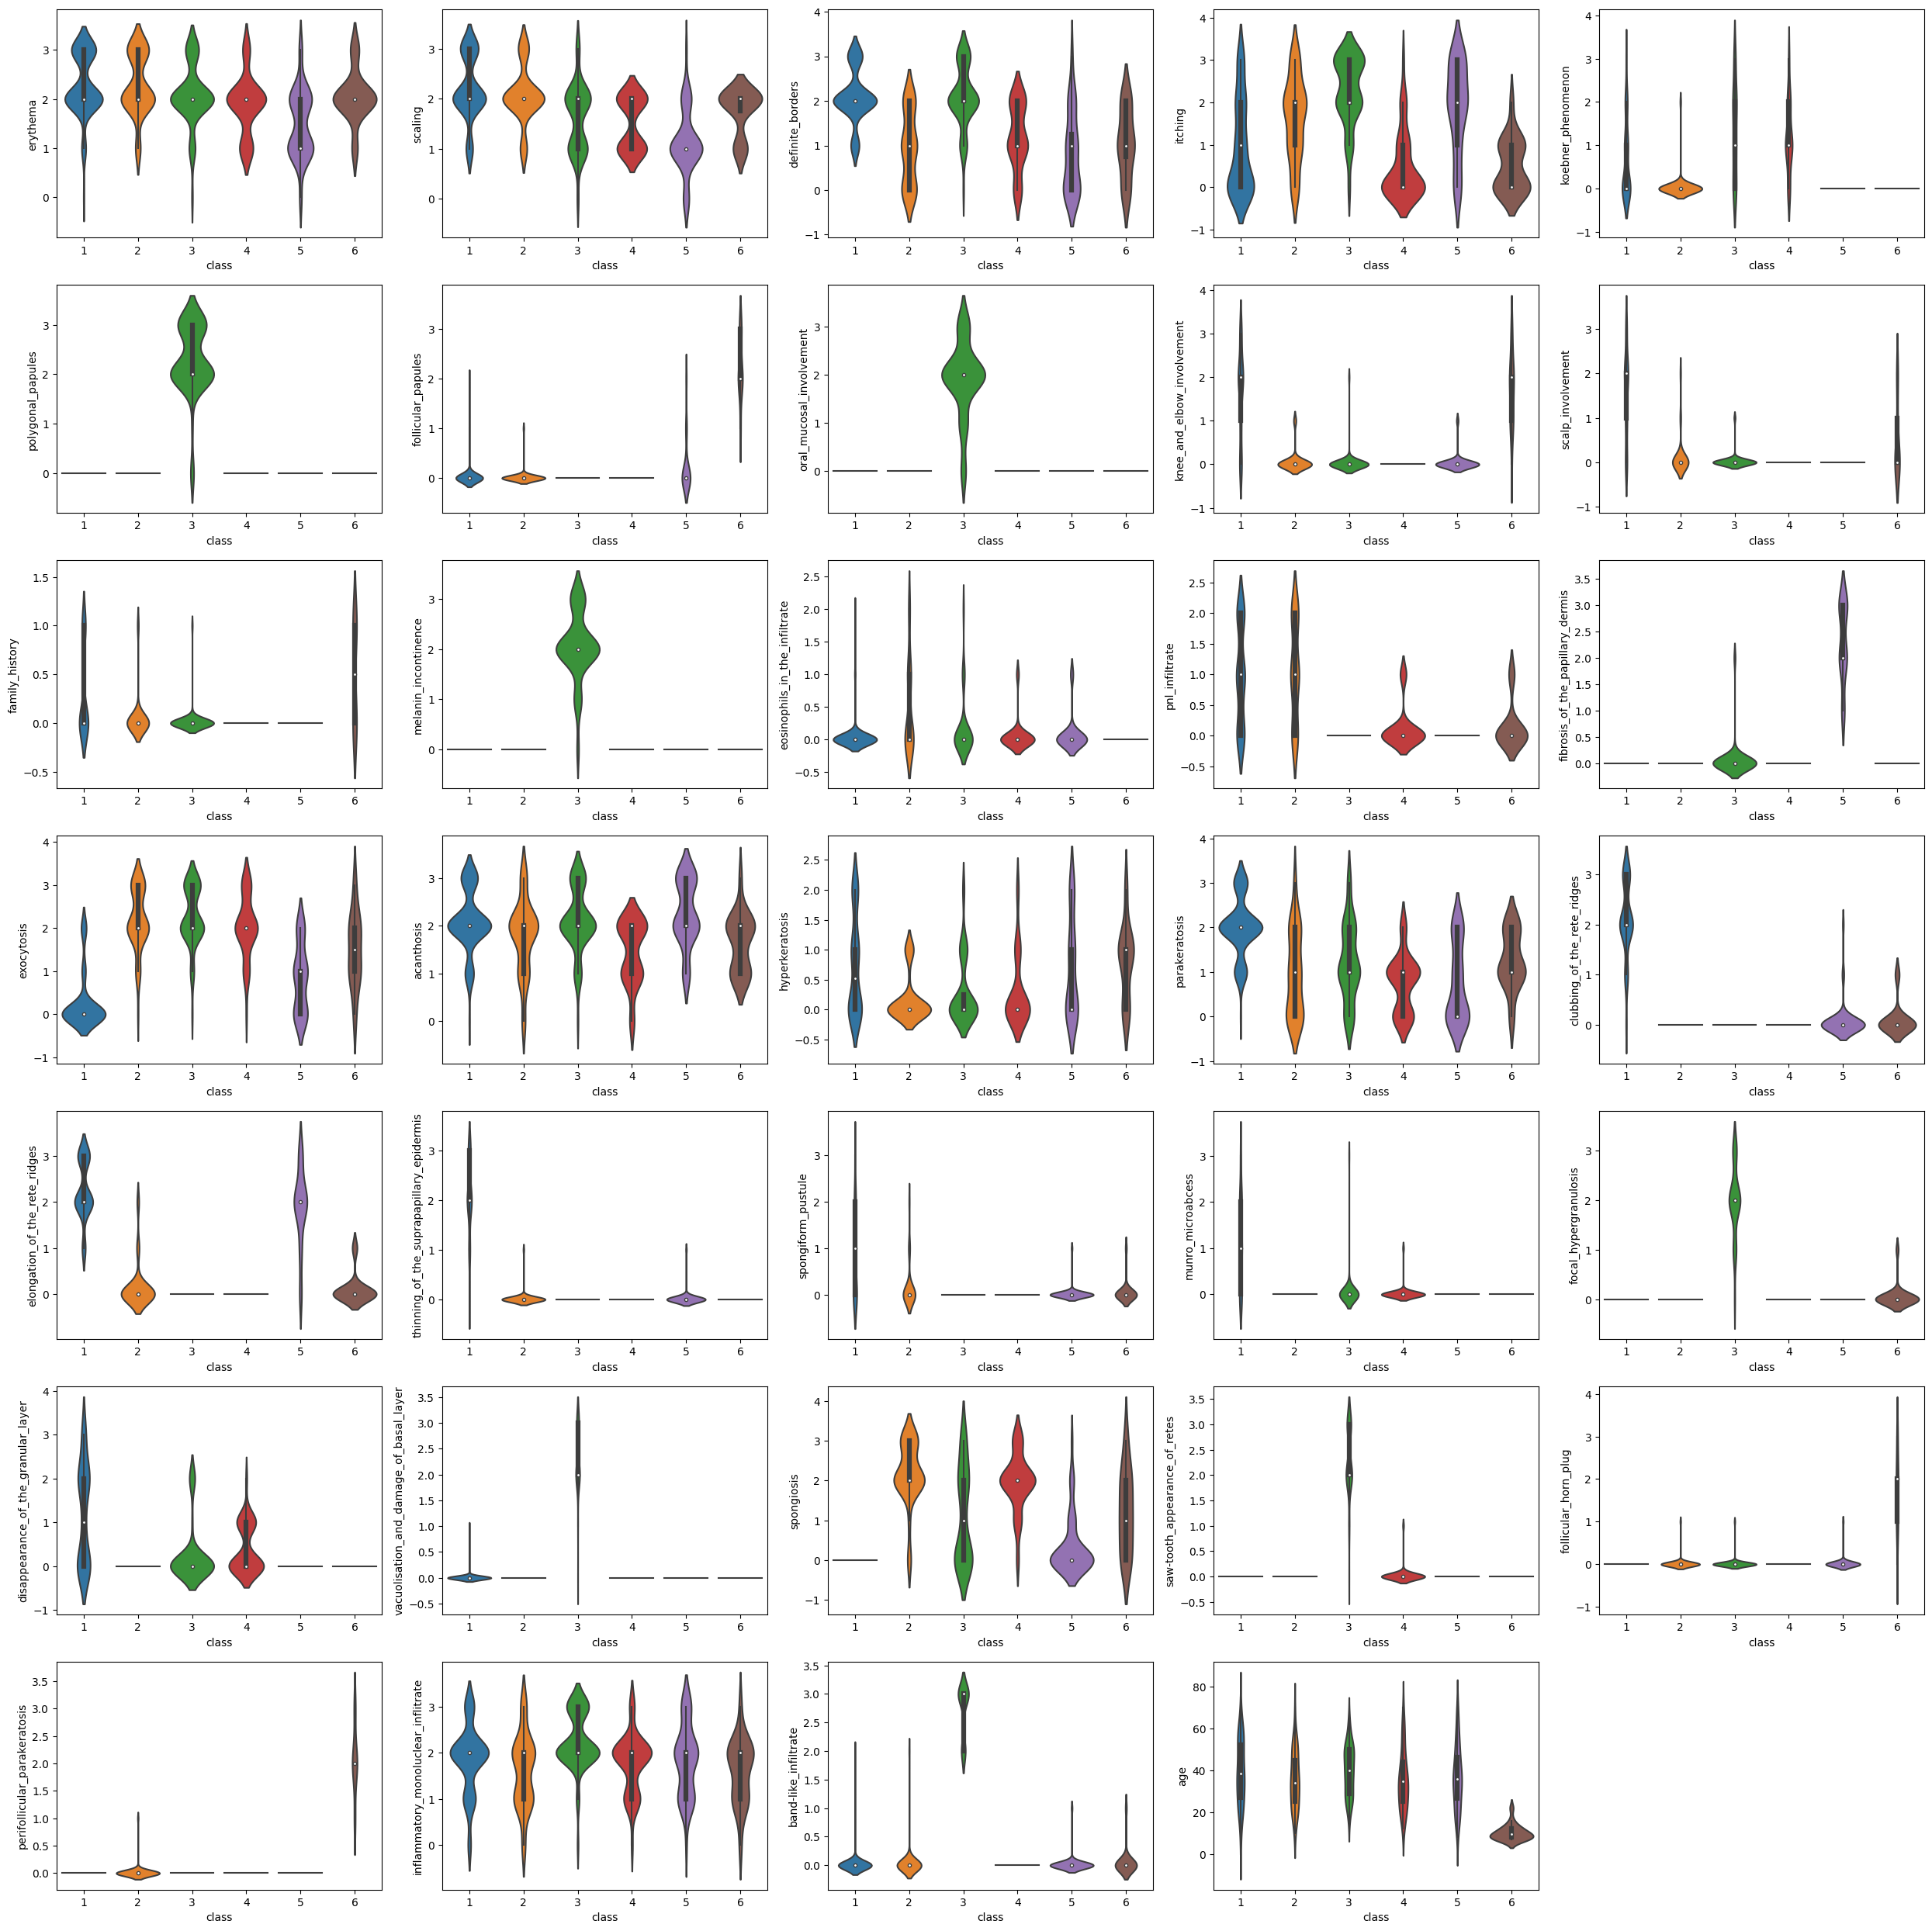

In [ ]:
import seaborn as sns

# Determina el número de filas y columnas en función de la cantidad de columnas en tu DataFrame
num_rows = len(dermatology.columns) // 5 + len(dermatology.columns) % 5  # Asegura al menos 2 filas
num_cols = 5

plt.figure(figsize=(25, 25))
for column_index, column in enumerate(dermatology.columns):
    if column == 'class':
        continue
    plt.subplot(num_rows, num_cols, column_index + 1)
    sns.violinplot(x='class', y=column, data=dermatology)

# Ajusta la disposición de los subplots
plt.tight_layout()

# Muestra los subplots
plt.show()

Thanks to this violin plot we can verify the initial analysis with the bar graphs about the features associated to each of the categories of the disease.

- Correlation system

In [ ]:
corr = dermatology.corr(method="pearson")
corr

erythema   scaling  \
erythema                                  1.000000  0.435467   
scaling                                   0.435467  1.000000   
definite_borders                          0.260087  0.357987   
itching                                  -0.047623 -0.084197   
koebner_phenomenon                        0.000694 -0.010576   
polygonal_papules                         0.033571 -0.075035   
follicular_papules                       -0.109550 -0.092400   
oral_mucosal_involvement                 -0.026810 -0.082969   
knee_and_elbow_involvement                0.141008  0.298398   
scalp_involvement                         0.186684  0.301577   
family_history                            0.172059  0.181491   
melanin_incontinence                      0.042126 -0.074856   
eosinophils_in_the_infiltrate             0.075228  0.042211   
pnl_infiltrate                            0.198872  0.279842   
fibrosis_of_the_papillary_dermis         -0.354595 -0.383585   
exocytosis                                0.021565 -0.110809   
acanthosis                                0.064165  0.108095   
hyperkeratosis                           -0.098828 -0.013731   
parakeratosis                             0.210030  0.296752   
clubbing_of_the_rete_ridges               0.157558  0.320740   
elongation_of_the_rete_ridges             0.007819  0.139073   
thinning_of_the_suprapapillary_epidermis  0.167868  0.330343   
spongiform_pustule                        0.169773  0.297783   
munro_microabcess                         0.113464  0.186366   
focal_hypergranulosis                    -0.013761 -0.085021   
disappearance_of_the_granular_layer       0.159100  0.211484   
vacuolisation_and_damage_of_basal_layer   0.002559 -0.109523   
spongiosis                                0.022468  0.012151   
saw-tooth_appearance_of_retes            -0.005779 -0.114467   
follicular_horn_plug                     -0.005450 -0.010518   
perifollicular_parakeratosis              0.009539 -0.011135   
inflammatory_monoluclear_inflitrate       0.075758 -0.010977   
band-like_infiltrate                     -0.006955 -0.132079   
age                                      -0.004974  0.015830   
class                                    -0.335537 -0.468688   

                                          definite_borders   itching  \
erythema                                          0.260087 -0.047623   
scaling                                           0.357987 -0.084197   
definite_borders                                  1.000000 -0.062564   
itching                                          -0.062564  1.000000   
koebner_phenomenon                                0.241342  0.267878   
polygonal_papules                                 0.327754  0.409696   
follicular_papules                               -0.166662 -0.144825   
oral_mucosal_involvement                          0.286684  0.359163   
knee_and_elbow_involvement                        0.302309 -0.299645   
scalp_involvement                                 0.268862 -0.155639   
family_history                                    0.115844 -0.136615   
melanin_incontinence                              0.311398  0.359207   
eosinophils_in_the_infiltrate                    -0.132021  0.095434   
pnl_infiltrate                                    0.003949 -0.099776   
fibrosis_of_the_papillary_dermis                 -0.274414  0.203032   
exocytosis                                       -0.205391  0.214822   
acanthosis                                        0.189761  0.067080   
hyperkeratosis                                    0.023478 -0.019125   
parakeratosis                                     0.361213 -0.075568   
clubbing_of_the_rete_ridges                       0.387205 -0.232224   
elongation_of_the_rete_ridges                     0.201702 -0.124058   
thinning_of_the_suprapapillary_epidermis          0.369266 -0.244052   
spongiform_pustule                                0.246204 -0.152689   
munro_mic

Because there are a great amount of columns in our dataset, we will need a graphical way to represent the correlation values between the features.

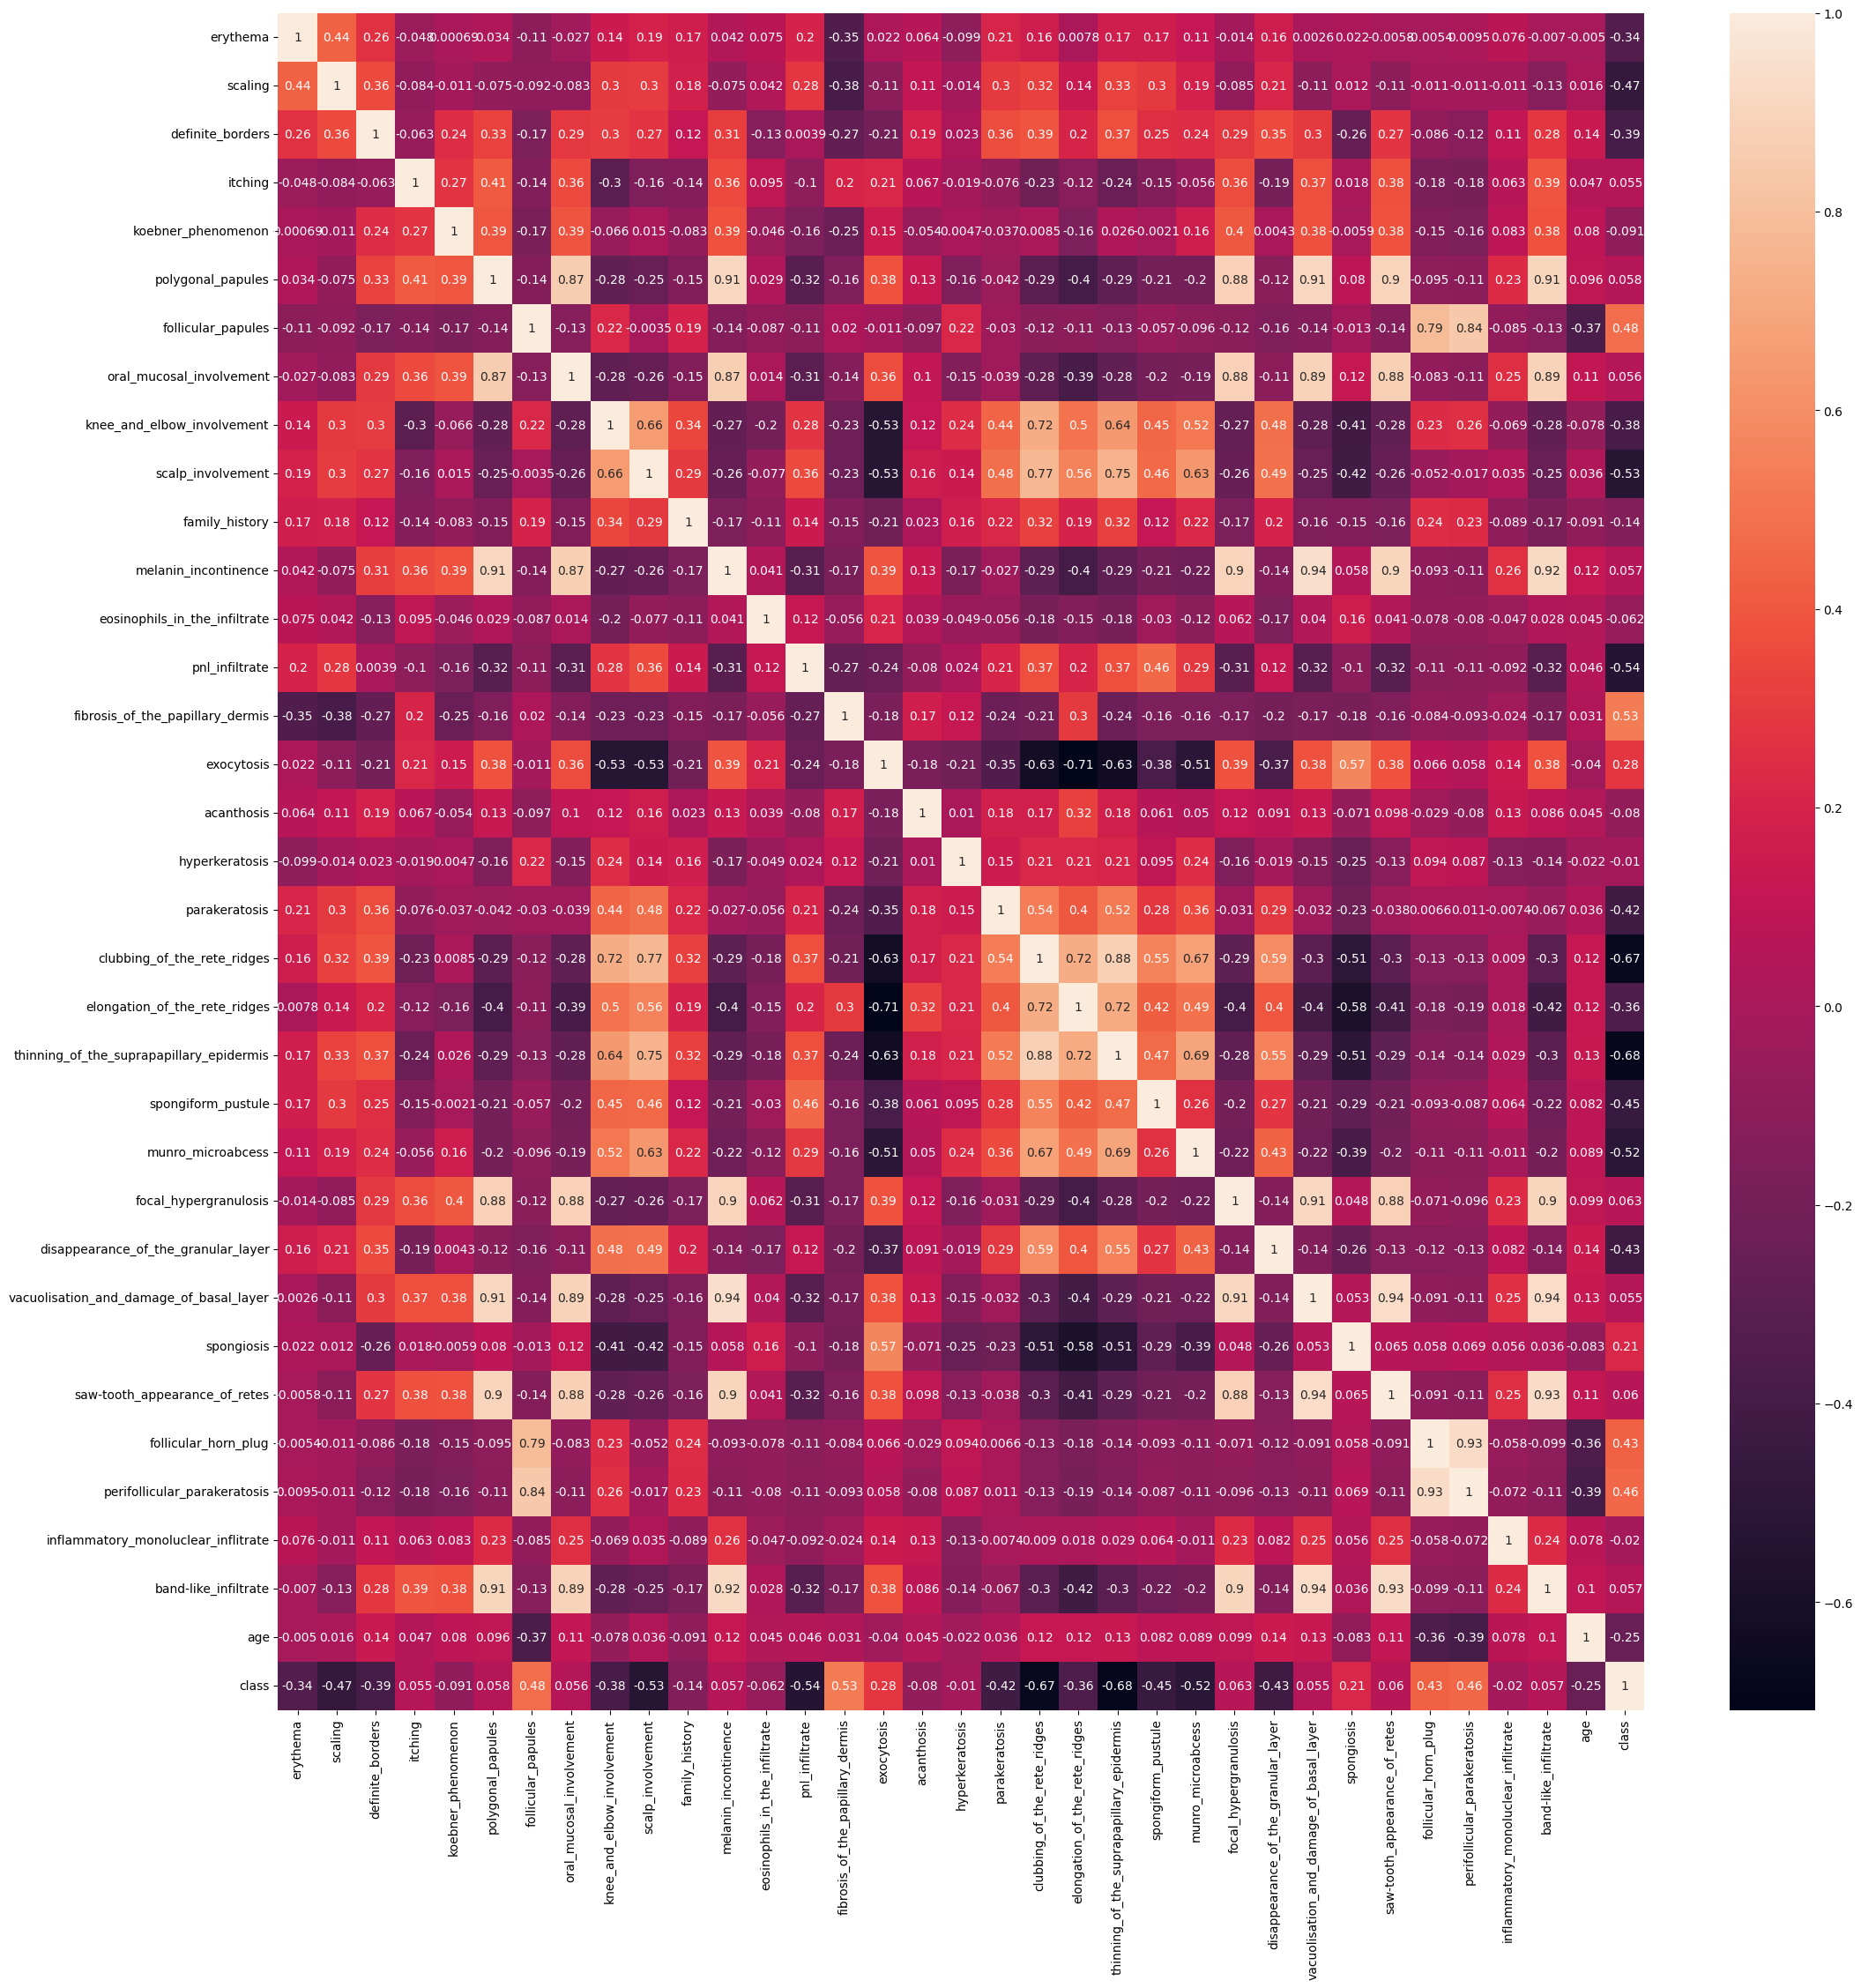

In [ ]:
#Heat map
plt.figure(figsize=(25, 25))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)
plt.show()

Despite the fact that we can find a correlation of 0.85 or higher in some clinical features with other clinical features (0.87 oral mucosal involvement <-> polygonal papules), clinical features with histopathological features (0.9 polygonal papules <-> saw tooth appearance of retes) and histopathological features with histopathological features (0.94 band-like infiltrate <-> vacuolisation and damage of basal layer) we will not remove any of the features due to our lack of expertise in the area and the need of a dermatologist consultation.

# **DATA PREPROCESSING**

During this process we will execute the following steps:

1. Encode the data
2. Standardise the data
3. Split data into training and testing

## DATA ENCODING

In our dataset we have one nominal value which is the family history (value of 0 or 1). We will use the One Hot Encoder to create a new binary column for each category in our original data.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Code generated by [2]
# Encode the family history feature
one_hot_encoder = OneHotEncoder(sparse=False)
nominal_data = dermatology[['family_history']]
encoded_data = one_hot_encoder.fit_transform(nominal_data)

# Update the dermatology data frame with the new columns
encoded_dermatology = pd.DataFrame(encoded_data,
                                   columns=
                                   one_hot_encoder.get_feature_names_out(
                                      ['family_history']))

# Concatenate the new dataframe with our old dataframe
# and drop the nominal value
dermatology = pd.concat([dermatology, encoded_dermatology], axis=1)
# Do the changes over the updated dataset instead of creating a new one
# This will save resources
dermatology.drop('family_history', axis=1, inplace=True)

# Check if the changes have been sucessful
print(dermatology.head())

   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  spongiosis  \
0                           1                  0  ...           3   
1             

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The nominal feature has been successfully been encoded into our dataframe. The next step is to standardise the dataset. This presents two choices:
- *StandardScaler()*
- *MinMaxScaler()*

The choice between using StandardScaler and MinMaxScaler (or other scaling methods) depends on the nature of our data and the characteristics of our machine learning model. Both scalers have their advantages, but StandardScaler is often preferred in many scenarios, including medical data, for several reasons:

- **Centering Data**: StandardScaler scales the data to have a mean of 0 and a standard deviation of 1. This is especially useful when working with medical data like our one because it centers the data around a mean of 0, which can help the model converge faster and be less sensitive to outliers.

- **Preserving Relationships**: StandardScaler maintains the relationships between data points. It doesn't change the distribution shape of the data but scales it linearly. This is important when the relationships between features are significant, which we could observe in the correlation matrix.

- **Robustness to Outliers**: StandardScaler is less sensitive to outliers compared to MinMaxScaler. Outliers can have a significant impact on MinMaxScaler because it scales data to a fixed range, and outliers can push the entire range of values. This could be seen when displaying the boxplots of each feature in the dataset.

- **Interpretability**: StandardScaler maintains the interpretability of the data because it doesn't change the range of the features. The scaled features still have the same units as the original features (e.g., age in years remains age in years).

- **Suitability for Many Algorithms**: Many machine learning algorithms, including neural networks, perform well with standardized data. Algorithms that rely on distance metrics, such as k-nearest neighbors or support vector machines, often benefit from standardization.

Nevertheless, there may be cases where MinMaxScaler is preferred, such as when we have specific requirements for feature scaling or when the model we are using is known to perform better with features scaled to a particular range.

In medical scenarios like this one, where data quality and interpretability are crucial, StandardScaler is generally a safe and effective choice. However, it's always a good practice to experiment with different scalers and preprocessing techniques to see which one works best for your specific dataset and model. We will not take into account this practice in our project. [2]

## STANDARD SCALER

The standard score of a sample x is calculated as: [5]

z = (x - u) / s

The following lines of code implement our StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
dermatology_s = dermatology.copy()
standard_scaler = StandardScaler()
# We escalate all the data except for the class, family_history_0
# and family_history_1 columns from the dataframe
non_linear_values = 3
for col in range(len(dermatology_s.columns)-non_linear_values):
    dermatology_s.iloc[:,col] = standard_scaler.fit_transform(
        dermatology_s.iloc[:, col].values.reshape(-1,1))

# Get a description of the scaled data
print(dermatology_s.head())

   erythema   scaling  definite_borders   itching  koebner_phenomenon  \
0 -0.102895  0.292503         -1.709375  1.437334           -0.699049   
1  1.403482  1.719916          1.600843  0.557628            0.403761   
2 -0.102895 -1.134911          0.497437  1.437334            0.403761   
3 -0.102895  0.292503          0.497437 -1.201784           -0.699049   
4 -0.102895  1.719916          0.497437  0.557628            1.506571   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0          -0.468702           -0.292496                 -0.452637   
1          -0.468702           -0.292496                 -0.452637   
2           2.669312           -0.292496                  3.148777   
3          -0.468702           -0.292496                 -0.452637   
4           1.623308           -0.292496                  1.948306   

   knee_and_elbow_involvement  scalp_involvement  ...  spongiosis  \
0                    0.392453          -0.574000  ...    1.813219   
1 

## Prepare Inputs and Outputs
In preparation of the train and test split and the neural network architecture, we must indicate the amount of input neurons (number of features/columns in our dataset) and the amount of output neurons (number of classes in our dataset).

In [ ]:
# We do not consider the column with the id of the rows
number_of_features = len(dermatology_s.columns) - 1
number_of_classes = dermatology_s['class'].nunique()

# Verifiy the data
print('Number of features:', number_of_features)
print('Number of classes:', number_of_classes)

Number of features: 35
Number of classes: 6


## Split train and test:

When using cross-validation, the need for a separate train-test split is less critical because cross-validation itself partitions the dataset into multiple train and test sets for robust validation. However, because we still want to reserve a separate test set in addition to cross-validation, an 80-20 or 70-30 split for the initial train-test split is commonly used. <br>
**IMPORTANT**: The code for the train_test_split will not be used to train our model due to the integration of Stratified KFold.

In [ ]:
from sklearn.model_selection import train_test_split #ML library
from keras.utils import to_categorical # Change data to categorical

# Prepare input and output
X_s = dermatology_s.drop(labels='class', axis=1) # input
Y_s = dermatology_s['class'] # output
# We need to modify the output to categorical for handling it in the neural
# network
Y_s -= 1
Y_s = to_categorical(Y_s, num_classes=number_of_classes)

# Assuming Y_s is your one-hot encoded labels
y_single_label = np.argmax(Y_s, axis=1)

# Reset the output
Y_s = dermatology_s['class'] # output

# Split data into training and testing with a 80-20 split just like in our
# previous project not using neural networks
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_s, Y_s, test_size=0.2,random_state=1)

# Verify shape of the values in each split
print(x_train_s.shape, y_train_s.shape)
print(x_test_s.shape, y_test_s.shape)

(292, 35) (292,)
(74, 35) (74,)


We can observe there are 35 columns which does not coincide with the 34 features we had initially. This is due to the label encoding of the family history which has generated two extra columns but removed the previous 'family_history' feature.

# **MODELLING & EVALUATION**

Generation and evaluation of Machine Learning models that best fit the objective and achieve the KPIs of the project:

Training: Neural Networks
Evaluation: Accuracy, precision, recall and f1 score

## **NEURAL NETWORKS**

We will build a Sequential model because we are managing data of the same nature: we are working with categorical values of clinical and patheological features of the e

---

MANUAL PARAMETER TUNING (WITH KERAS)

---

The method we will use to train our dataset is by creating a Sequential Model with the Keras library. We will use a Sequential model due to nature of the data (all related to a medical problem). Were there different data, such as images and audio, we would opt for building a Functional model. Given the requirements of the project we will use a 3-Fold Cross Validation.

We import the necessary libraries setting up the Stratified 3-Fold Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

We build the Stratified 3-Fold Validator with 3 splits and the data shuffled.

In [ ]:
kfold = StratifiedKFold(n_splits=3, shuffle=True)

We build the model taking as a reference the one built for the MNIST dataset in the Intelligent Systems Subject [4]. We initially set the input layer to connect 32 neurons with the ReLU activation function. The next two hidden layers had 64 and 32 neurons respectively with the ReLU activation function. The activation functions were later modified to the Tanh activation function due to a slight increase in performance of the model accross all metrics. The final layer was set up with the number of classes as neurons and activation function of SoftMax.<br>
With the model.summary() method we can get a description of the layers and number of parameters which need to be adjusted. We have a total of 5542 parameters which we can adjust. This is due to the small size of the dataset and the use of fully connected neural networks instead of adding some convolutional layers. We have not used Convolutional Neural Networks (CNNs) due to the simplicity of the medical problem (only 366 data points). Instead of using the add() method in the keras library we will declare it as an array like indicated in the Sequential API documentaion of Keras [3].

We import the necessary libraries for building the Neural Network Model.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

We import the necessary libraries for evaluating each one of the folds with the four metrics asked in the requirements (accuracy, precision, recall, f1 score).

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

We compile the model with the following parameters: [1]
- <u>Loss</u>: categorical crossentropy. This loss function is commonly used for multi-class classification problems. It measures the difference between the predicted class probabilities and the true class label, penalizing larger errors more heavily.
- <u>Optimiser</u>: adam. Adam adjusts the learning rates for each parameter adaptively. It combines the benefits of AdaGrad and RMSprop by using both first and second moments of the gradients. In addition, it often converges quickly and works well in practice across a wide range of problems.
- <u>Metrics</u>: accuracy. Provides an overall measure of correct predictions out of the total predictions made by the model.

We fit the model with 10 epochs (iterations) and a batch size of 6 because the factors of 366 are 1, 2, 3, 6, 61, 122, 183, 366 and 6 is one of them. This helps us distribute equally the batches through the epochs.

We evaluate the model with the x_test and y_test.

We create a prediction from this evaluation.

Finally, we get the metrics, a classification report and a confusion matrix which we will use to analyse the performance of our Neural Network Model compared to the models of our previous project. We will display the confusion matrix with a pretty graphic and obtain an average of the four metrics across the 3 folds.

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 32)                1152      
                                                                 
 dropout_54 (Dropout)        (None, 32)                0         
                                                                 
 dense_217 (Dense)           (None, 64)                2112      
                                                                 
 dense_218 (Dense)           (None, 32)                2080      
                                                                 
 dense_219 (Dense)           (None, 6)                 198       
                                                                 
Total params: 5542 (21.65 KB)
Trainable params: 5542 (21.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
41/41 [=

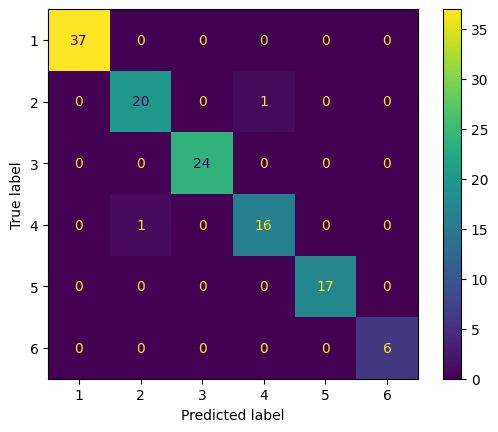

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 32)                1152      
                                                                 
 dropout_55 (Dropout)        (None, 32)                0         
                                                                 
 dense_221 (Dense)           (None, 64)                2112      
                                                                 
 dense_222 (Dense)           (None, 32)                2080      
                                                                 
 dense_223 (Dense)           (None, 6)                 198       
                                                                 
Total params: 5542 (21.65 KB)
Trainable params: 5542 (21.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
41/41 [=

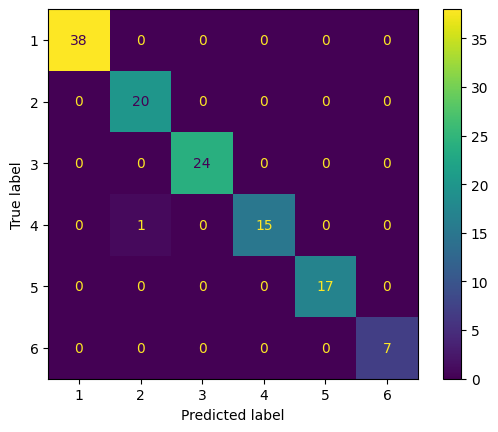

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_224 (Dense)           (None, 32)                1152      
                                                                 
 dropout_56 (Dropout)        (None, 32)                0         
                                                                 
 dense_225 (Dense)           (None, 64)                2112      
                                                                 
 dense_226 (Dense)           (None, 32)                2080      
                                                                 
 dense_227 (Dense)           (None, 6)                 198       
                                                                 
Total params: 5542 (21.65 KB)
Trainable params: 5542 (21.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
41/41 [=

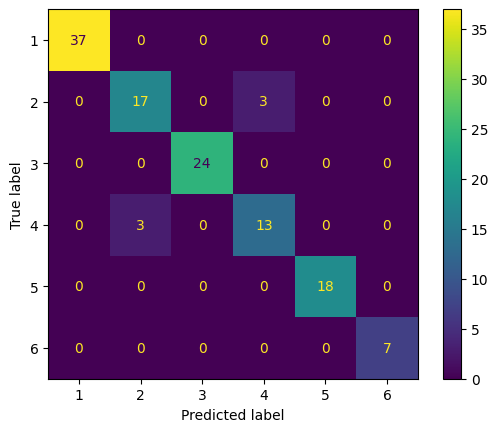

Average Accuracy: 97.54%
Average Precision: 97.27%
Average Recall: 97.19%
Average F1 Score: 97.22%


In [ ]:
# Initialise the fold number
fold_no = 1

# Initialise lists to store metrics of each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train, test in kfold.split(X_s, Y_s):

    # Convert labels back to categorical
    # This step is needed to fit the model correctly [2]
    y_train_fold = to_categorical(y_single_label[train], num_classes=number_of_classes)
    y_test_fold = to_categorical(y_single_label[test], num_classes=number_of_classes)

    # Create a new instance of the model
    model = Sequential([
        Dense(32, activation='relu', input_shape=(number_of_features,)),
        Dropout(0.1),
        Dense(64, activation='tanh'),
        Dense(32, activation='tanh'),
        Dense(number_of_classes, activation='softmax')
    ])

    # Get a model summary
    model.summary()

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Fit the model
    model.fit(X_s.iloc[train], y_train_fold, epochs=20, batch_size=6, verbose=1)

    # Evaluate the model [4]
    scores = model.evaluate(X_s.iloc[test], y_test_fold, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%')

    # Create a prediction [4]
    y_pred = model.predict(X_s.iloc[test])
    y_pred_classes = np.argmax(y_pred, axis=1)
    # This is needed because Y_s has been transformed again to categorical
    y_true = np.argmax(y_test_fold, axis=1)

    # Calculate metrics for this fold
    accuracies.append(accuracy_score(y_true, y_pred_classes))
    precisions.append(precision_score(y_true, y_pred_classes, average='macro'))
    recalls.append(recall_score(y_true, y_pred_classes, average='macro'))
    f1_scores.append(f1_score(y_true, y_pred_classes, average='macro'))

    # Get a classification report
    print(classification_report(y_true, y_pred_classes))

    # Display Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    class_names = ['1', '2', '3', '4', '5', '6']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot()
    plt.show()

    # Continue to next fold
    fold_no += 1

# Calculate and print average metrics
average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1_score = np.mean(f1_scores)

# Display average metrics
print(f"Average Accuracy: {average_accuracy * 100:.2f}%")
print(f"Average Precision: {average_precision * 100:.2f}%")
print(f"Average Recall: {average_recall * 100:.2f}%")
print(f"Average F1 Score: {average_f1_score * 100:.2f}%")

## Metrics Evaluation

Across Accuracy, Precision, Recall and F1 Score we get a score above 97% which is a better score than the one obtained with our chosen model in our previous project: `PassiveAggresiveClassifier` -> 96% or less in Accuracy, Precision, Recall and F1 Score.

An accuracy, precision, recall, and F1 score above 97% for our model indicates a high level of performance. Here's a brief analysis of what each metric reveals: [2]

- **Accuracy (97.54%)**: This is the proportion of true results (both true positives and true negatives) among the total number of cases examined. An accuracy of 97.5% suggests the model correctly predicts the outcome (whether it is a correct classification or not) for 97.54% of the samples in our dermatology dataset. High accuracy is generally desirable, but it is also important to consider the balance of classes in our dataset. For instance, there is an imbalance of values from classes 1 and 6, meaning high accuracy might not be a good indicator of model performance.

- **Precision (97.27%)**: Precision is the ratio of true positives to the sum of true and false positives. It indicates the reliability of the model in classifying a sample as positive. A precision of 97.27% implies that when the model predicts a particular class, it is correct 97.27% of the time. This is important in our dataset, medics want to diagnose the most people possible in order for them to live a longer and healthier life.

- **Recall (97.19%)**: Also known as sensitivity, recall is the ratio of true positives to the sum of true positives and false negatives. It shows how well the model can identify all relevant cases. A recall of 97.19% means the model successfully identifies 97.19% of all actual positives. High recall is crucial in our scenario because missing out on true positives is critical in diagnosing skin diseases.

- **F1 Score (97.22%)**: The F1 score is the harmonic mean of precision and recall. It's a single metric that combines both precision and recall to give a balanced view of the model's performance. This is very useful in our case because we are dealing with an imbalanced dataset. An F1 score of 97.22% indicates a strong balance between precision and recall, suggesting the model is performing well both in terms of reliability (precision) and completeness (recall).

## Overall Analysis
The Neural Network model shows exceptional performance across all these metrics, which indicates that it is highly effective in both identifying the correct class and minimising misclassifications.<br>
The consistency across all four metrics suggests that the model is well-balanced and not biased towards precision or recall.<br>

## Comparative Analysis with Previous Models

When comparing the performance of our current `Neural Network` model (with an average of 97.5% across accuracy, precision, recall, and F1 score) against the `PassiveAggressiveClassifier` from our previous project (with an average performance of 96% across the same metrics), there are several factors to consider, especially in the context of medical diagnosis for dermatological diseases: [2]

1. **Performance Metrics:**
   - `Neural Network`: With slightly higher scores in all metrics, our neural network indicates a marginally better overall performance (1.5% increase). This could mean it is more effective in correctly diagnosing dermatological diseases with fewer false positives and negatives.
   - `PassiveAggressiveClassifier`: While slightly lower in performance, a 96% average across metrics is still commendable and might be sufficient for certain applications.

2. **Model Robustness and Consistency:**
   - Consistency in performance across different datasets or under various conditions is crucial. We would need to evaluate whether the marginal improvement in performance with the neural network is consistent across different sets of data, especially unseen data.
   - The robustness of the model in handling data variability typical in medical diagnoses is also important.
   - We will not be able to carry out a further analysis in this aspect due to the scope of this project but in a real life application this step is crucial.

3. **Interpretability:**
   - Medical diagnosis demands a high degree of interpretability for trust and reliability. `Neural Networks`, while powerful, are often considered "black boxes" and can lack the interpretability of simpler models like PassiveAggressiveClassifiers.
   - The ability to explain a model's decision is crucial in medical settings for clinicians to trust and understand the model's predictions.

4. **Handling Imbalanced Data:**
   - Dermatological datasets can be imbalanced (some diseases are rarer than others) which occurs in our scenario. It is important to assess how each model performs in the presence of class imbalance.
   - Sometimes, simpler models or specific techniques might handle imbalance better than complex models like `Neural Networks`.

5. **Computational Efficiency:**
   - The `Neural Network` generally requires more computational resources for both training and inference, which could be a limitation in certain environments.
   - The `PassiveAggressiveClassifier` might be more efficient and easier to deploy in environments with limited computational capacity.

6. **Error Consequences:**
   - In a medical context, the consequences of false positives and false negatives can be significant. For instance, a false negative in a severe dermatological condition could be more critical than a false positive.
   - The neural network best minimises the more critical type of error for our dermatology dataset but not by a great amount, only a margin of 1.5%.  

7. **Generalization Capability:**
   - It is important to test how well each model generalizes to new, unseen data, which is crucial for a model's applicability in real-world scenarios.
   - This aspect, joint with the robustness and consistency, will not be investigated further once again due to the limited resources of our project.

## Conclusion:
- **Best Model**: The "best" model depends on a balance of the above factors. If the neural network's slight edge in performance is consistent and reliable, and if its complexity and lack of interpretability are not major obstacles, it could be the preferred model. However, if interpretability, computational efficiency, and handling of imbalanced data are critical, the `PassiveAggressiveClassifier` might be more suitable despite its slightly lower performance metrics.
- **Clinical Validation**: Regardless of the model chosen, clinical validation is key. The model should be tested and validated in real-world clinical settings to ensure its effectiveness and reliability in actual medical diagnoses.

Ultimately, the choice of the model should align with the specific requirements and constraints of your application, especially considering the critical nature of medical diagnosis in dermatology. Nevertheless, given the previous considerations a `PassiveAggressiveClassifier` would be the model to train our dataset thanks to its edge on interpretability and computational efficiency, two key factors needed for clinical validation.

# REFERENCES
[1] ChatGPT-3.5, OpenAI: https://chat.openai.com

[2] ChatGPT-4, OpenAI: https://chat.openai.com

[3] Keras Documentation: https://keras.io/

[4] Teacher's Notes, Rafael del Hoyo Alonso, Intelligent Systems, Plataforma Docente Universitaria: https://pdu.usj.es

[5] Scikit Learn Documentation: https://scikit-learn.org